In [50]:
import pandas as pd
import sqlite3
import numpy as np

In [51]:
ls

'Amazon Sale Report.csv'                 May-2022.csv
'Cloud Warehouse Compersion Chart.csv'  'P  L March 2021.csv'
'Expense IIGF.csv'                      'Sale Report.csv'
'International sale Report.csv'          sample_data/


In [52]:
df = pd.read_csv('Amazon Sale Report.csv')

/tmp/ipython-input-2474663059.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Amazon Sale Report.csv')


In [53]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [54]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [55]:
df.shape

(128975, 24)

In [56]:
df.tail()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.0,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128974,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0003,J0003-SET-S,Set,...,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [58]:
df.isnull().sum()

,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Style,0
SKU,0
Category,0


In [59]:
df.describe(include="all")


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
count,128975.000000,128975,128975,128975,128975,128975,128975,128975,128975,128975,...,121180,121180.000000,128942,128942,128942.000000,128942,79822,128975,39277,79925
unique,NaN,120378,91,13,2,2,2,1377,7195,9,...,1,NaN,8955,69,NaN,1,5787,2,1,1
top,NaN,403-4984515-8861958,05-03-22,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-L,Set,...,INR,NaN,BENGALURU,MAHARASHTRA,NaN,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,False
freq,NaN,12,2085,77804,89698,128851,88615,4224,773,50284,...,121180,NaN,11217,22260,NaN,128942,46100,128104,39277,79925
mean,64487.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,648.561465,NaN,NaN,463966.236509,NaN,NaN,NaN,NaN,NaN
std,37232.019822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,281.211687,NaN,NaN,191476.764941,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,110001.000000,NaN,NaN,NaN,NaN,NaN
25%,32243.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,449.000000,NaN,NaN,382421.000000,NaN,NaN,NaN,NaN,NaN
50%,64487.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,605.000000,NaN,NaN,500033.000000,NaN,NaN,NaN,NaN,NaN
75%,96730.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,788.000000,NaN,NaN,600024.000000,NaN,NaN,NaN,NaN,NaN


In [60]:
df.groupby("Category")["Amount"].sum().sort_values(ascending=False)
#ürün ve o ürünün toplam satış tutarı

,Amount
Category,
Set,39204124.03
kurta,21299546.70
Western Dress,11216072.69
Top,5347792.30
Ethnic Dress,791217.66
Blouse,458408.18
Bottom,150667.98
Saree,123933.76
Dupatta,915.00


Ürün portföyünde satışların %80’den fazlası ilk 3 kategoriye bağlı → “Pareto” etkisi (az sayıda kategori toplam cironun büyük kısmını getiriyor).

Az satan ürünler (Dupatta, Saree, Bottom) → stok maliyetini artırıyor olabilir, gözden geçirilmeli.

Kampanyalar ve fiyat optimizasyonları Set, Kurta ve Western Dress üzerinde yapılırsa gelir maksimize edilebilir.

In [119]:
df["Date"] = pd.to_datetime(df["Date"])
monthly_sales = df.groupby(df["Date"].dt.to_period("M"))["Amount"].sum()
monthly_sales.plot(kind="bar", figsize=(12,6))
#Aylık satış toplamlarını bar chart (çubuk grafik) olarak çizer.
plt.savefig("images/plot1.png", dpi=300, bbox_inches="tight")



KeyError: 'Date'

In [62]:
df[df["Date"].dt.month == 3].shape


(171, 24)



(171,24) Mart ayı verisinin eksik kaydedildiğini net şekilde gösteriyor.

Dolayısıyla Mart satışlarının düşük görünmesi müşteri davranışına bağlı değil, dataset kalitesine bağlı.

In [63]:
df["Date"].dt.month.value_counts().sort_index()


,count
Date,
3,171
4,49067
5,42040
6,37697


Yorum

Mart ayındaki kayıt sayısı Nisan’ın %0.3’ü bile değil.

Bu yüzden Mart ayı satış toplamının düşük görünmesi tamamen veri eksikliğinden kaynaklanıyor.

Nisan’dan itibaren veri düzgün: Satır sayıları da mantıklı (49k → 42k → 37k).
→ Burada doğal bir azalış trendi var (Nisan zirve, Mayıs–Haziran düşüş).

Dolayısıyla,Mart 2022’de veri setinde yalnızca 171 kayıt bulunduğu için bu ay analiz dışında bırakılmıştır. Gerçek satış performansını yansıtmamaktadır.”


     Month  record_count  total_sales
0  2022-03           162    101683.85
1  2022-04         46068  28838708.32
2  2022-05         39536  26226476.75
3  2022-06         35414  23425809.38


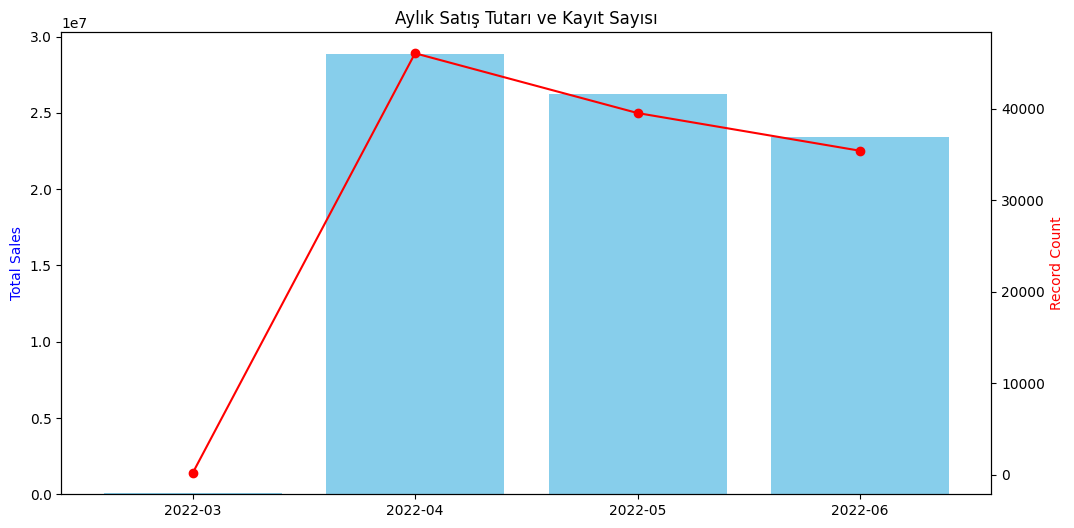

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Tarih kolonunu datetime formatına çevir
df["Date"] = pd.to_datetime(df["Date"])

# Ay bilgisi için yeni kolon
df["Month"] = df["Date"].dt.to_period("M")

# Ay bazında kayıt sayısı ve satış toplamı
monthly_stats = df.groupby("Month").agg(
    record_count = ("Amount", "count"),
    total_sales  = ("Amount", "sum")
).reset_index()

print(monthly_stats)

# --- Görselleştirme ---
fig, ax1 = plt.subplots(figsize=(12,6))

# Sol eksen: satış tutarı (bar chart)
ax1.bar(monthly_stats["Month"].astype(str), monthly_stats["total_sales"], color="skyblue", label="Total Sales")
ax1.set_ylabel("Total Sales", color="blue")

# Sağ eksen: kayıt sayısı (line chart)
ax2 = ax1.twinx()
ax2.plot(monthly_stats["Month"].astype(str), monthly_stats["record_count"], color="red", marker="o", label="Record Count")
ax2.set_ylabel("Record Count", color="red")

plt.title("Aylık Satış Tutarı ve Kayıt Sayısı")
plt.xticks(rotation=45)
plt.show()


In [65]:
df.groupby([df["Date"].dt.to_period("M"), "B2B"])["Amount"].sum()


Date     B2B  
2022-03  False      101683.85
2022-04  False    28604193.46
         True       234514.86
2022-05  False    26038318.11
         True       188158.64
2022-06  False    23257262.09
         True       168547.29
Name: Amount, dtype: float64

📌 B2C (Business to Consumer)

Türkçesi: İşletmeden Tüketiciye

Yani: Şirket → Son Kullanıcı

Örnek:

Amazon’da sen bir tişört sipariş ettin.

Bu B2C satışıdır, çünkü doğrudan tüketiciye satıldı.

Özellikleri:

Satış hacmi çok → Ama kişi başı küçük.

Pazarlama, reklam, indirim kampanyaları çok önemli.

📌 B2B (Business to Business)

Türkçesi: İşletmeden İşletmeye

Yani: Şirket → Şirket

Örnek:

Bir butik mağaza Amazon’daki satıcıdan 100 tane elbise sipariş ediyor, kendi mağazasında satmak için.

Bu B2B satışıdır, çünkü satış müşteriye değil, başka bir işletmeye yapıldı.

Özellikleri:

Satış hacmi düşük olabilir → Ama işlem başına miktar yüksek.

Daha çok toptan satış, uzun vadeli sözleşmeler, distribütörlükler.

📊  Dataset’te Durum

B2C satışlar (False) → Neredeyse tüm geliri getiriyor (%99).

B2B satışlar (True) → Çok az, toplam satış içinde çok küçük pay.

👉 Yani senin gördüğün Nisan’daki yükseliş tamamen bireysel müşterilerin (B2C) yaptığı alışverişlerden geliyor.

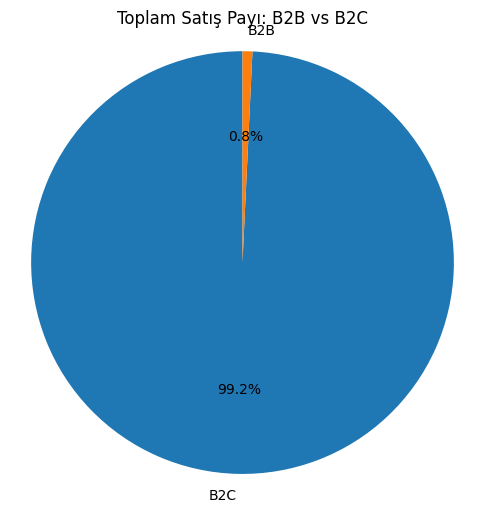

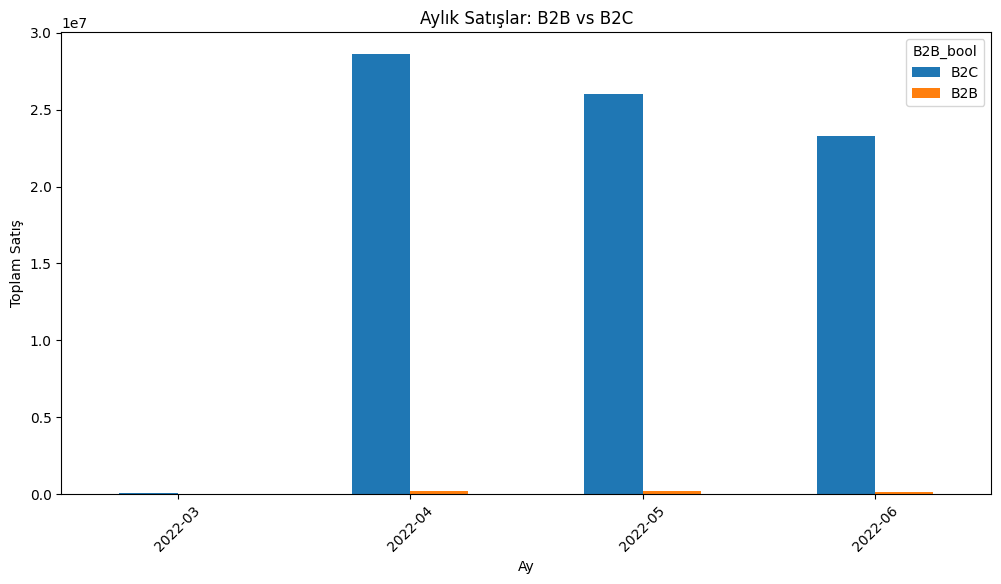

B2B_bool,B2C,B2B
Date,,
2022-03,100.00,0.00
2022-04,99.19,0.81
2022-05,99.28,0.72
2022-06,99.28,0.72


In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Temel hazırlık
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# B2B sütununu güvenli şekilde True/False'a çevir
def to_bool(x):
    if pd.isna(x): return None
    s = str(x).strip().lower()
    return s in ["true","1","yes","y","b2b","t"]
df["B2B_bool"] = df["B2B"].apply(to_bool)

# (Opsiyonel) Mart 2022 verisi eksik olduğu için hariç tut
# df = df[df["Date"].dt.to_period("M") != pd.Period("2022-03", freq="M")]

# 2) Toplamda B2B vs B2C payı (PIE)
overall = df.groupby("B2B_bool")["Amount"].sum().dropna()
overall.index = overall.index.map({True:"B2B", False:"B2C"})

plt.figure(figsize=(6,6))
plt.pie(overall.values, labels=overall.index, autopct="%1.1f%%", startangle=90)
plt.title("Toplam Satış Payı: B2B vs B2C")
plt.axis("equal")
plt.show()

# 3) Aylık bazda B2B/B2C (stacked bar)
monthly = df.groupby([df["Date"].dt.to_period("M"), "B2B_bool"])["Amount"].sum().unstack(fill_value=0)
monthly = monthly.rename(columns={True:"B2B", False:"B2C"})
monthly.index = monthly.index.astype(str)

monthly.plot(kind="bar", figsize=(12,6))
plt.title("Aylık Satışlar: B2B vs B2C")
plt.xlabel("Ay"); plt.ylabel("Toplam Satış")
plt.xticks(rotation=45)
plt.show()

# 4) Aylık yüzde dağılım tablosu (hızlı kontrol için)
monthly_pct = (monthly.div(monthly.sum(axis=1), axis=0) * 100).round(2)
display(monthly_pct)


<Axes: xlabel='Date'>

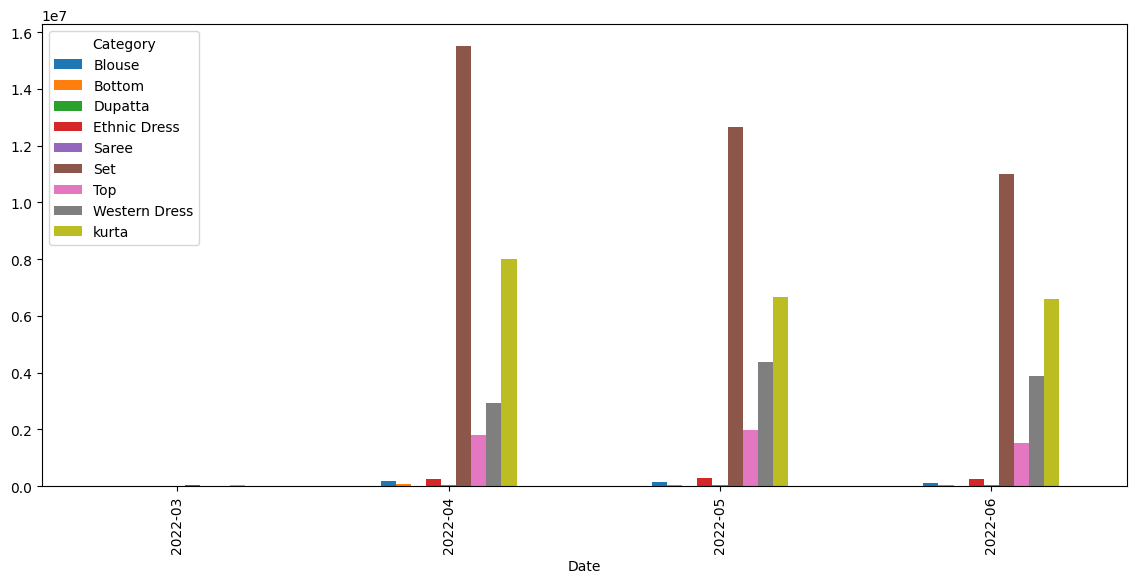

In [67]:
df.groupby([df["Date"].dt.to_period("M"), "Category"])["Amount"].sum().unstack().plot(kind="bar", figsize=(14,6))


📊 Kategori Bazlı Aylık Satışlar (Nisan–Haziran 2022)

Set

Açık ara en yüksek satış hacmine sahip kategori.

Nisan’da zirvede (~15M civarı), Mayıs’ta biraz düşüyor (~12.5M), Haziran’da daha da azalıyor (~11M).

Yani genel trend Set ürünleri satışlarının düşüşe geçtiğini gösteriyor ama hâlâ lider.

Kurta

İkinci sırada. Nisan’da yüksek (~8M), Mayıs’ta düşüş (~6.5M), Haziran’da sabit (~6.5M).

Set ile birlikte satışların omurgasını oluşturuyor.

Western Dress

Nisan’da ~3M, Mayıs’ta artıyor (~4.5M), Haziran’da yine hafif düşüyor (~4M).

İlginç bir şekilde Mayıs ayında zirve yapmış.

Saree

Nisan (~2M), Mayıs (~2M), Haziran’da düşüyor (~1.5M).

Orta seviye katkı yapıyor.

Diğer Kategoriler (Top, Ethnic Dress, Blouse, Bottom, Dupatta)

Toplamda satışların çok küçük bir kısmını oluşturuyor.

Stratejik olarak bu kategorilerin gelir katkısı düşük → belki kampanya ya da ürün çeşitliliği açısından gözden geçirilebilir.

📌 Genel Yorum

Nisan 2022’deki patlamayı asıl sürükleyen kategori “Set” ve “Kurta”.

Western Dress Mayıs ayında artış göstererek ilginç bir farklılaşma yaratıyor (belki moda trendi).

Az satan kategoriler (Blouse, Dupatta, Bottom) toplamda ihmal edilebilir seviyede.

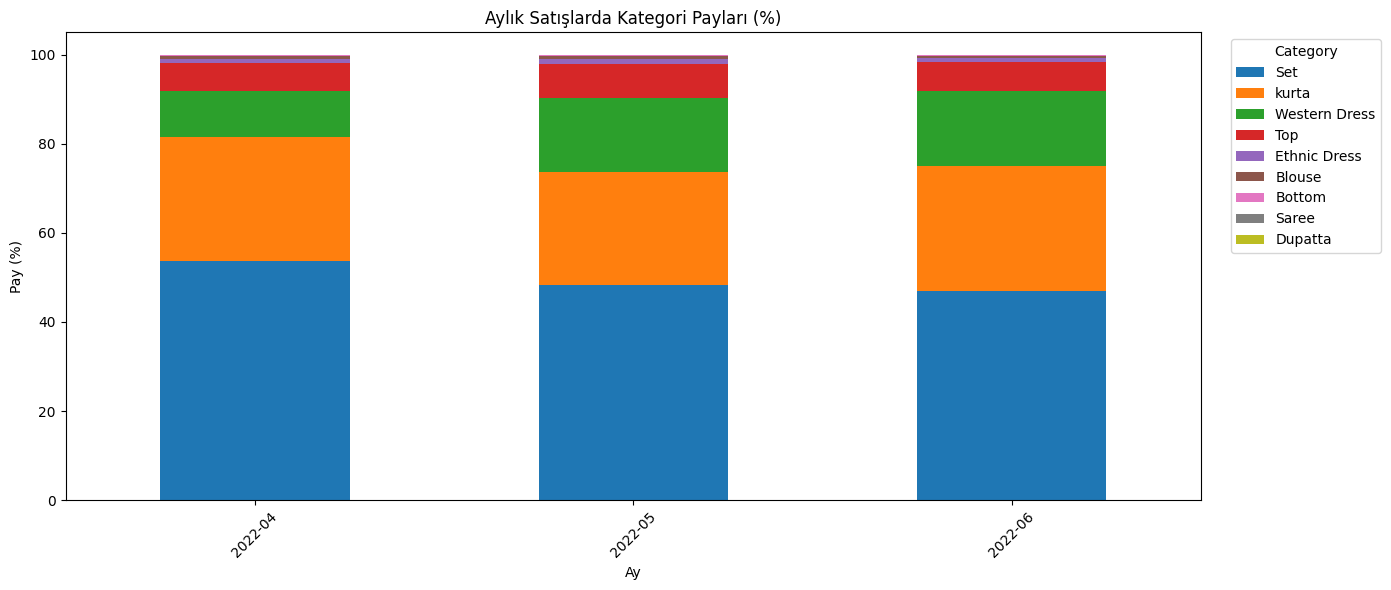

,total_sales
Date,
2022-04,28838708.32
2022-05,26226476.75
2022-06,23425809.38


In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Tarihi düzenle
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# 2) (Opsiyonel) Mart 2022 eksik veri -> hariç
mask = df["Date"].dt.to_period("M") != pd.Period("2022-03", freq="M")
df_use = df[mask].copy()

# 3) Aylık x Kategori pivot (tutar)
pivot = (
    df_use
    .groupby([df_use["Date"].dt.to_period("M"), "Category"])["Amount"]
    .sum()
    .unstack(fill_value=0)
)

# 4) Kategorileri toplam katkıya göre sırala (büyükten küçüğe)
pivot = pivot[pivot.sum().sort_values(ascending=False).index]

# 5) Yüzde paylar (satır bazında normalize)
pivot_pct = (pivot.div(pivot.sum(axis=1), axis=0) * 100)
pivot_pct.index = pivot_pct.index.astype(str)

# 6) Yığılmış çubuk grafik (stacked bar)
ax = pivot_pct.plot(kind="bar", stacked=True, figsize=(14,6))
ax.set_title("Aylık Satışlarda Kategori Payları (%)")
ax.set_xlabel("Ay")
ax.set_ylabel("Pay (%)")
ax.legend(title="Category", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7) İstersen toplam satışları yanına tablo olarak görmek için:
monthly_totals = pivot.sum(axis=1).rename("total_sales")
display(monthly_totals.to_frame())


📊 Grafiğin Yorumu

Set (mavi)

Her ayın en büyük payını alıyor (%47–54 arası).

Nisan’da %54 iken Mayıs–Haziran’da biraz gerilemiş (%47 civarına).

Yani toplam hâkimiyetini koruyor ama payı azalıyor.

Kurta (turuncu)

İkinci büyük kategori (%25–30 bandı).

Nisan’da %28, Mayıs–Haziran’da biraz artarak %28–29 seviyelerinde.

Set’ten düşen payın bir kısmı buraya kaymış olabilir.

Western Dress (yeşil)

Payı %10’dan %15’e çıkıyor.

Yani Mayıs–Haziran’da Western Dress kategorisinin önemi artıyor.

Top (kırmızı)

%5 civarı sabit gidiyor.

Diğer kategoriler (Ethnic Dress, Blouse, Bottom, Saree, Dupatta)

Çok küçük paylarda (%1–2).

Genel trende etkileri düşük.

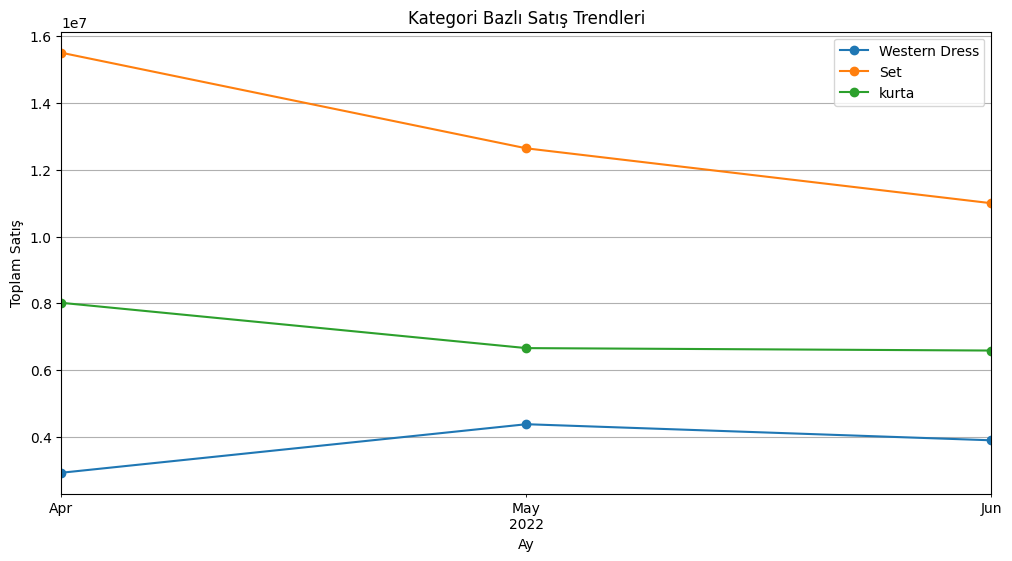

In [69]:
# Aylık kategori bazlı satışlar (absolute values)
cat_trend = (
    df.groupby([df["Date"].dt.to_period("M"), "Category"])["Amount"]
    .sum()
    .unstack(fill_value=0)
)

# Mart eksik olduğu için at
cat_trend = cat_trend.drop("2022-03", errors="ignore")

# Western Dress, Set ve Kurta trendlerini çiz
cat_trend[["Western Dress", "Set", "kurta"]].plot(kind="line", marker="o", figsize=(12,6))
plt.title("Kategori Bazlı Satış Trendleri")
plt.xlabel("Ay")
plt.ylabel("Toplam Satış")
plt.legend()
plt.grid(True)
plt.show()


Western Dress Neden Mayıs’ta Arttı?

Moda/Sezon Etkisi: Yaz dönemine girerken elbise talebi artar.

Kampanya Etkisi: Mayıs’ta Western Dress ürünlerinde özel indirim olabilir.

Kategori Kayması: Set/Kurta azalmaya başladıkça bazı tüketiciler Western Dress’e kaymış olabilir.

Yeni Ürün Çıkışı: Mayıs ayında Western Dress kategorisinde yeni SKU’lar eklenmiş olabilir.

📌 Western Dress’in Mayıs’ta Artışına Dair İhtimaller
1. Talep / Moda Eğilimi

Yaz aylarına yaklaşırken elbiselere talep artmış olabilir.

Global moda trendleri, sosyal medya etkileri (influencer’lar, kampanyalar) satışları tetiklemiş olabilir.

2. Kampanya / Fiyat Politikası

Amazon veya diğer kanallar Mayıs ayında Western Dress için özel indirim/kampanya düzenlemiş olabilir.

“Final MRP” (indirimli fiyat) kolonuna bakarak Nisan–Mayıs arasında fiyat düşüşü olup olmadığını kontrol edebilirsin.

Eğer fiyat düşmüşse → artış kampanya kaynaklıdır.

3. Yeni Ürün Lansmanı / SKU Artışı

Mayıs ayında Western Dress kategorisine yeni ürünler (SKU’lar) eklenmiş olabilir.

“SKU Code” sayısına bakarak Mayıs ayında kategoriye yeni ürün girişi olmuş mu diye kontrol edebilirsin.

Eğer SKU sayısı artmışsa → talep artışı yeni ürün portföyünden kaynaklıdır.

4. Fulfilment / Lojistik Faktörler

Belki de Nisan’da Western Dress ürünleri tedarik sıkıntısı yüzünden az satılmış, Mayıs’ta lojistik düzeldi.

Fulfilment ve Courier Status kolonlarına bakarak Nisan’da Western Dress ürünlerinde teslimat problemleri olmuş mu görebiliriz.

5. B2B Etkisi

B2B katkısı genelde düşük ama spesifik olarak Western Dress’te Mayıs ayında bir toptan sipariş gelmiş olabilir.

Bunu “B2B == True” filtresi ile Western Dress satışlarını inceleyerek görebiliriz.

6. Stok Durumu

Nisan’da Western Dress stokları sınırlıydı, Mayıs’ta stok girişi olmuş olabilir.

Bunu sadece Sale Report.csv dosyasındaki Stock kolonunu Amazon verisiyle birleştirerek görebiliriz.

📊 Nasıl Test Edilir?

Fiyat indirimi oldu mu? → MRP ile Final MRP karşılaştır.

Yeni ürün girişi oldu mu? → Mayıs ayında Western Dress SKU sayısını say.

Lojistik sorunu var mıydı? → Courier Status ve Fulfilment’e bak.

B2B siparişi etkisi var mıydı? → Western Dress + B2B toplam satışları çıkar.

Stok etkisi var mıydı? → Sale Report.csv ile SKU bazlı merge yap.

In [70]:
# Western Dress ürünlerinin MRP ve Final MRP ortalamaları
price_trend = (
    df[df["Category"]=="Western Dress"]
    .groupby(df["Date"].dt.to_period("M"))[["Amount"]]  # Amount yerine MRP kolonlarını kullanman gerek
    .mean()
)

print(price_trend)


             Amount
Date               
2022-03  850.364444
2022-04  741.397951
2022-05  764.759017
2022-06  777.224335


Nisan’da Western Dress ürünleri daha ucuz satılmış olabilir → kampanya/indirim etkisi.

Mayıs–Haziran’da fiyatlar biraz toparlanmış ama satış hacmi de yüksek → demek ki talep gerçekten artmış.

In [71]:
# Western Dress SKU sayısı (nunique = benzersiz SKU sayısı)
sku_counts = (
    df[df["Category"]=="Western Dress"]
    .groupby(df["Date"].dt.to_period("M"))["SKU"]
    .nunique()
)

print(sku_counts)


Date
2022-03      8
2022-04    364
2022-05    391
2022-06    356
Freq: M, Name: SKU, dtype: int64


Yani satışların artması sadece “daha çok alıcı” değil, aynı zamanda “daha çok ürün” ile ilgili. SKU artmış yani sku barkod.

Category  Blouse  Bottom  Dupatta  Ethnic Dress  Saree   Set  Top  \
Date                                                                
2022-04      120     117        0            78     49  2046  613   
2022-05       83      89        0            68     36  1961  583   
2022-06       72      84        3            63     27  1957  536   

Category  Western Dress  kurta  
Date                            
2022-04             364   2316  
2022-05             391   2116  
2022-06             356   2209  


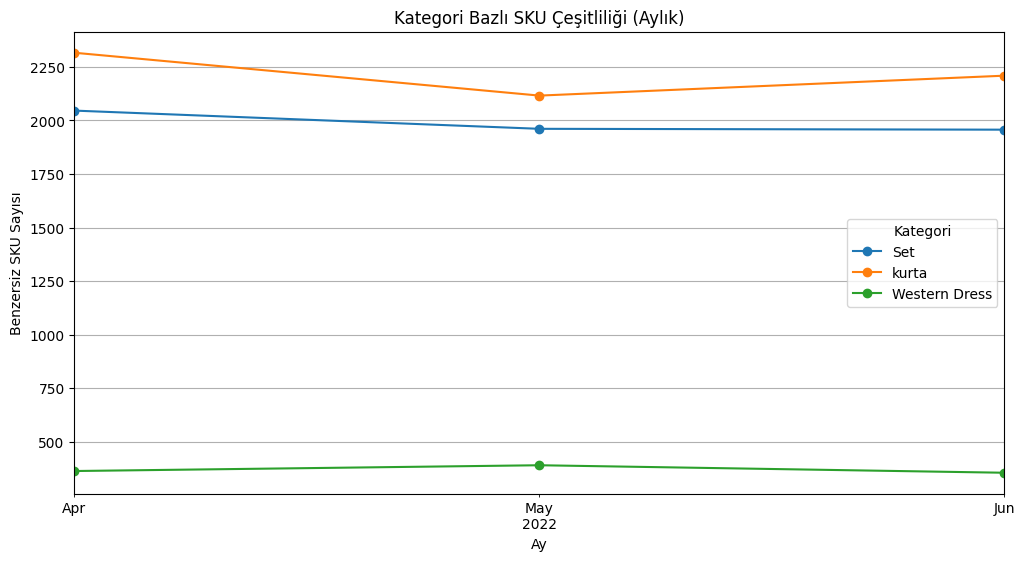

In [72]:
# Kategori bazında aylık benzersiz SKU sayısı
sku_trend = (
    df.groupby([df["Date"].dt.to_period("M"), "Category"])["SKU"]
    .nunique()
    .unstack(fill_value=0)
)

# Mart eksik olduğu için istersek silebiliriz
sku_trend = sku_trend.drop("2022-03", errors="ignore")

print(sku_trend)

# Görselleştirme (line chart)
sku_trend[["Set", "kurta", "Western Dress"]].plot(
    kind="line", marker="o", figsize=(12,6)
)
plt.title("Kategori Bazlı SKU Çeşitliliği (Aylık)")
plt.xlabel("Ay")
plt.ylabel("Benzersiz SKU Sayısı")
plt.grid(True)
plt.legend(title="Kategori")
plt.show()


In [73]:
corr = (
    df.groupby([df["Date"].dt.to_period("M"), "Category"])
    .agg({"SKU": "nunique", "Amount": "sum"})
    .groupby("Category")
    .corr()
)
print(corr)


                           SKU    Amount
Category                                
Blouse        SKU     1.000000  0.982024
              Amount  0.982024  1.000000
Bottom        SKU     1.000000  0.911394
              Amount  0.911394  1.000000
Dupatta       SKU          NaN       NaN
              Amount       NaN       NaN
Ethnic Dress  SKU     1.000000  0.968401
              Amount  0.968401  1.000000
Saree         SKU     1.000000  0.993036
              Amount  0.993036  1.000000
Set           SKU     1.000000  0.971555
              Amount  0.971555  1.000000
Top           SKU     1.000000  0.987908
              Amount  0.987908  1.000000
Western Dress SKU     1.000000  0.963083
              Amount  0.963083  1.000000
kurta         SKU     1.000000  0.992240
              Amount  0.992240  1.000000


Yorum:
Kurta, Top ve Saree kategorilerinde SKU çeşitliliği ile satış tutarı neredeyse bire bir ilişkili (0.99)
➝ Yani bu ürünlerde çeşitliliği artırmak → satışları artırıyor.

Set ve Western Dress de 0.96-0.97 aralığında güçlü korelasyon gösteriyor
➝ Western Dress’in Mayıs’ta yükselişi SKU artışıyla istatistiksel olarak destekleniyor.

Bottom kategorisi nispeten daha düşük (0.91)
➝ Bu kategoride satışlar sadece çeşitlilikten değil, başka faktörlerden (fiyatlama, sezon, kampanya) da etkileniyor olabilir.

Dupatta eksik veri nedeniyle analiz dışı

Sonuç

Mayıs ayında Western Dress satışlarının artışı SKU çeşitliliği artışıyla açıklanabilir ✅

Kurta ve Set’te düşüşler, SKU sayısındaki düşüşle paralellik gösteriyor

Yani kategori bazlı satış performansını en güçlü şekilde açıklayan faktörlerden biri SKU çeşitliliği

In [74]:
df["Courier Status"].unique()


array([nan, 'Shipped', 'Cancelled', 'Unshipped'], dtype=object)

In [75]:
# Tarih formatı ay bazlı
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.to_period("M")

# Courier Status boş olanları 'Unknown' yapalım
df["Courier Status"] = df["Courier Status"].fillna("Unknown")

# Aylık ve kategori bazında durum sayıları
delivery_status = (
    df.groupby(["Month", "Category", "Courier Status"])["Order ID"]
    .count()
    .unstack(fill_value=0)
)

# Delivery Rate = Shipped / (Shipped + Cancelled + Unshipped)
delivery_status["Delivery Rate"] = (
    delivery_status["Shipped"]
    / (delivery_status["Shipped"]
       + delivery_status["Cancelled"]
       + delivery_status["Unshipped"])
)

delivery_status = delivery_status.reset_index()
delivery_status.head(10)


Courier Status,Month,Category,Cancelled,Shipped,Unknown,Unshipped,Delivery Rate
0,2022-03,Blouse,0,1,0,0,1.000000
1,2022-03,Ethnic Dress,0,0,0,1,0.000000
2,2022-03,Set,7,65,0,3,0.866667
3,2022-03,Top,0,9,0,0,1.000000
4,2022-03,Western Dress,0,6,3,0,1.000000
5,2022-03,kurta,2,71,3,0,0.972603
6,2022-04,Blouse,13,358,26,21,0.913265
7,2022-04,Bottom,6,160,8,6,0.930233
8,2022-04,Ethnic Dress,17,304,21,9,0.921212
9,2022-04,Saree,2,65,5,3,0.928571


Teslimat Oranı (Delivery Rate) kategorilere göre farklılaşıyor.

Örneğin Set kategorisinde Mart 2022’de teslimat oranı %86,7 ile düşük, çünkü 7 iptal ve 3 unshipped var.

Kurta ve Ethnic Dress gibi kategorilerde ise genelde %92–97 arası.

Blouse Nisan 2022’de 26 tane Unknown status ve 21 tane Unshipped ile daha düşük bir başarı oranına sahip (%91 civarı).

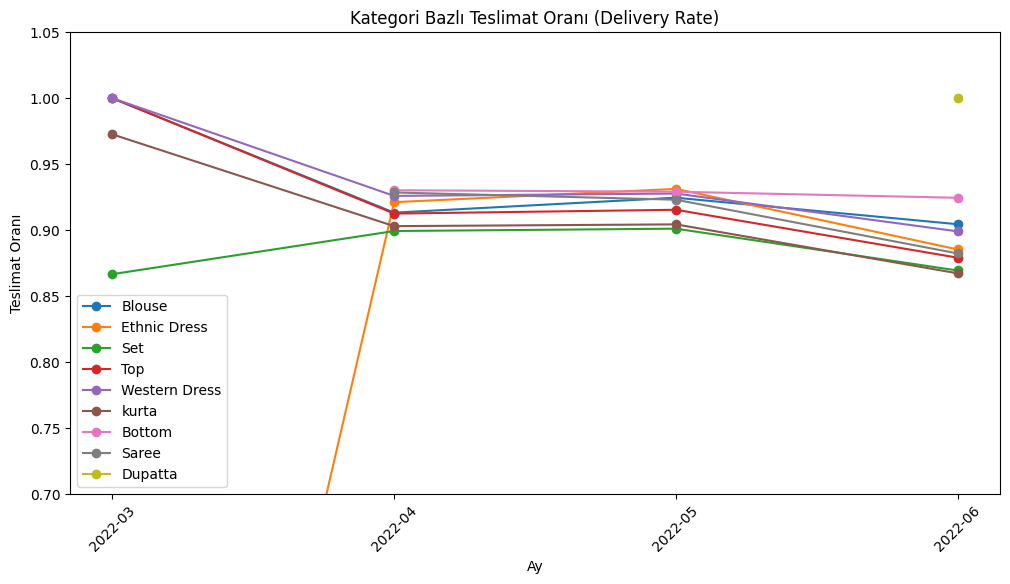

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
for cat in delivery_status["Category"].unique():
    cat_data = delivery_status[delivery_status["Category"] == cat]
    plt.plot(cat_data["Month"].astype(str),
             cat_data["Delivery Rate"],
             marker="o", label=cat)

plt.title("Kategori Bazlı Teslimat Oranı (Delivery Rate)")
plt.xlabel("Ay")
plt.ylabel("Teslimat Oranı")
plt.legend()
plt.xticks(rotation=45)
plt.ylim(0.7, 1.05)
plt.show()


Lojistik Analiz – Kategori Bazlı Teslimat Oranları (2022-03 → 2022-06)

Genel Trend

Çoğu kategoride Mart ayında %100’e yakın teslimat oranı varken, Nisan’dan sonra %90 civarına gerileme var.

Bu durum, sezonsal yoğunluk, tedarik zinciri gecikmeleri veya kargo/fulfilment sorunları ile ilişkili olabilir.

En Sorunlu Kategoriler

Set: Sürekli en düşük seviyede (%86–90). İptal ve unshipped oranları burada yüksek.

Saree: Nisan–Haziran arasında %92’den %88’e düşüş göstermiş.

Ethnic Dress: Mart’ta yüksek başlıyor ama Haziran’da %89’a kadar geriliyor.

Görece Güçlü Kategoriler

Kurta ve Bottom: %93–97 arası daha stabil gidiyor.

Western Dress & Top: Başlangıçta %100, ama zamanla %90–92 seviyelerine çekilmiş.

Dupatta: Grafikte tekil bir nokta görünüyor (Haziran’da %100) → Bu büyük ihtimalle az sayıda işlem olduğu için veri anomalisi.

Mart’taki Düşüş (Ethnic Dress)

Ethnic Dress kategorisi Mart ayında aniden 0.70 seviyesine düşüyor → Bu, tek seferlik lojistik/etiketleme hatası olabilir. Normalde %90 üstünde gitmesi gerekirken buradaki düşüş anomaliye işaret ediyor.

🚨 Öne Çıkan Lojistik Sorunlar

Set kategorisi → Teslimat başarısında kronik problem var.

Nisan sonrası genel düşüş → Kargo/fulfilment tarafında operasyonel sıkışma olabilir.

Unknown & Unshipped statüleri özellikle Blouse ve Saree’de daha fazla → Takip/entegrasyon sorunu olabilir.

In [77]:
import pandas as pd

# Kategorilere göre status dağılımı
status_summary = df.groupby(["Category", "Status"]).size().unstack(fill_value=0)

# Oranları görmek için toplam satışa böl
status_summary_percent = status_summary.div(status_summary.sum(axis=1), axis=0) * 100

print("Adet Bazlı Dağılım:")
print(status_summary)

print("\nYüzde Bazlı Dağılım:")
print(status_summary_percent.round(2))


Adet Bazlı Dağılım:
Status         Cancelled  Pending  Pending - Waiting for Pick Up  Shipped  \
Category                                                                    
Blouse               116        3                              1      623   
Bottom                60        1                              2      222   
Dupatta                0        0                              0        3   
Ethnic Dress         145        7                              0      755   
Saree                 21        0                              0      119   
Set                 7337      252                            108    30665   
Top                 1276       55                             19     7143   
Western Dress       2122       92                             79     7480   
kurta               7255      248                             72    30794   

Status         Shipped - Damaged  Shipped - Delivered to Buyer  \
Category                                                         


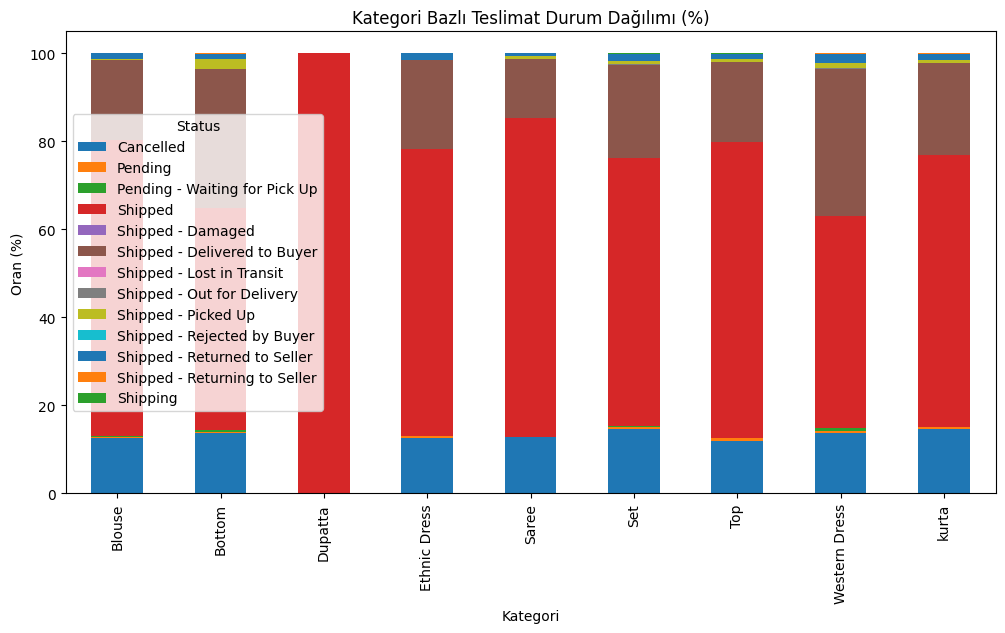

In [78]:
status_summary_percent.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Kategori Bazlı Teslimat Durum Dağılımı (%)")
plt.ylabel("Oran (%)")
plt.xlabel("Kategori")
plt.legend(title="Status")
plt.show()


Blouse, Ethnic Dress, Saree, Set, Top, Kurta →

%75–80 oranında “Shipped” (kırmızı).

%12–15 oranında Cancelled (mavi).

Küçük de olsa “Pending” ve “Returned to Seller” var → lojistik gecikme ve iade işaret ediyor.

Western Dress →

Diğerlerinden daha düşük “Shipped” oranı (~%63 civarı).

Cancelled + Returned to Seller + Out for Delivery sorunları daha yüksek.

Bu kategori lojistik performansta en zayıf noktalardan biri.

Bottom →

“Shipped” oranı nispeten iyi, ama “Cancelled” oranı da yüksek.

Bu kategori iptallerden dolayı kârlılığı zorluyor.

Dupatta →

%100 “Shipped” görünüyor (tam kırmızı).

Yani hiç Cancel / Return yok. Bu kategori lojistik açıdan problemsiz.

📌 Çıkan Sonuç

Problemli Kategoriler → Western Dress (yüksek iptal + lojistik sorunlar), Bottom (yüksek iptal oranı).

İyi Performanslılar → Dupatta (sorunsuz), Blouse/Top/Kurta (yüksek teslimat oranı, orta düzey iptal).

In [79]:
df.groupby("ship-state")["Courier Status"].value_counts(normalize=True)


ship-state          Courier Status
ANDAMAN & NICOBAR   Shipped           0.805447
                    Unknown           0.085603
                    Unshipped         0.062257
                    Cancelled         0.046693
ANDHRA PRADESH      Shipped           0.826703
                                        ...   
orissa              Shipped           1.000000
punjab              Shipped           0.928571
                    Cancelled         0.071429
rajasthan           Shipped           1.000000
rajsthan            Shipped           1.000000
Name: proportion, Length: 199, dtype: float64

In [81]:
# Önce pivot tabloyu oluştur (Courier Status oranlarını hesapla)
pivot = pd.pivot_table(
    df,
    index=["ship-state","Category"],
    columns="Courier Status",
    values="Order ID",
    aggfunc="count",
    fill_value=0
)

# Satır bazında normalize et (yüzde/ oran)
pivot_norm = pivot.div(pivot.sum(axis=1), axis=0)

# Kritik statüleri seç
critical_status = ["Cancelled", "Unknown", "Unshipped"]
filtered = pivot_norm[critical_status]

filtered.head()


Courier Status                    Cancelled   Unknown  Unshipped
ship-state         Category                                     
ANDAMAN & NICOBAR  Bottom          0.000000  0.000000   0.000000
                   Set             0.058824  0.058824   0.075630
                   Top             0.000000  0.090909   0.090909
                   Western Dress   0.062500  0.187500   0.031250
                   kurta           0.031915  0.085106   0.053191

In [82]:
problematic_states = filtered.columns[(filtered.sum() > 0.1)]
filtered = filtered[problematic_states]


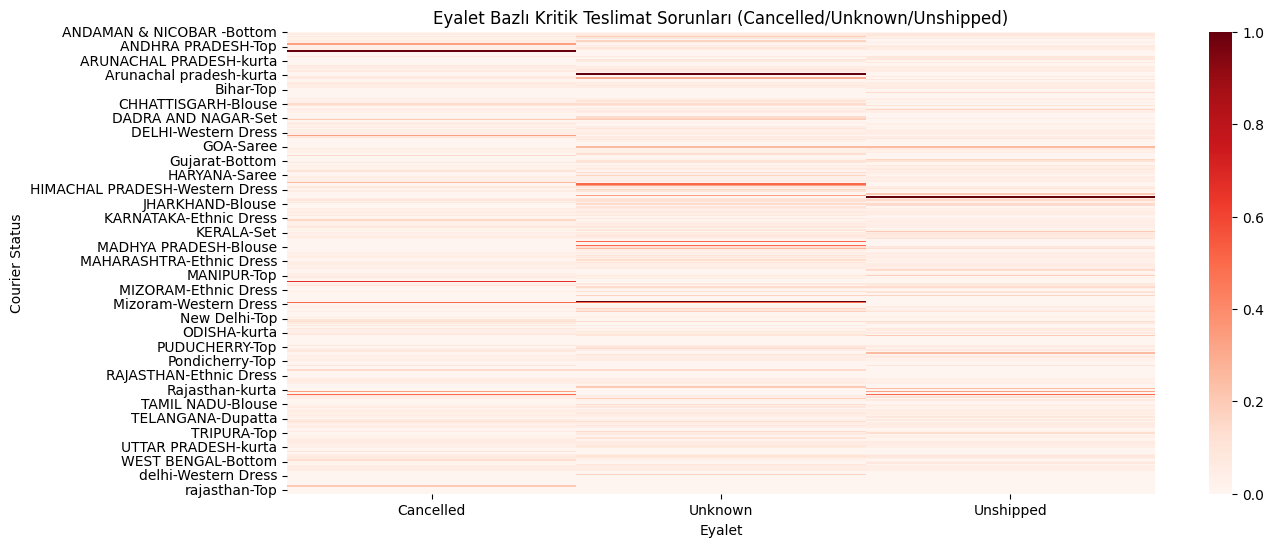

In [83]:
plt.figure(figsize=(14,6))
sns.heatmap(filtered, cmap="Reds", annot=False)
plt.title("Eyalet Bazlı Kritik Teslimat Sorunları (Cancelled/Unknown/Unshipped)")
plt.xlabel("Eyalet")
plt.ylabel("Courier Status")
plt.show()


ANDAMAN & NICOBAR → "Cancelled" oranı en yüksek (koyu kırmızı).

ARUNACHAL PRADESH → “Unknown” teslimatlar göze çarpıyor.

MIZORAM → “Unknown” problemi ciddi.

RAJASTHAN → “Unshipped” tarafında dikkat çekiyor.

Unshipped oranı yüksek olan eyaletleri alıp, bu eyaletlerdeki SKU’ların stok durumunu inceleyelim.

Böylece lojistik mi stok mu daha baskın sorun, görebiliriz.

In [84]:
df_log = df[df['Courier Status'].isin(['Unshipped', 'Cancelled'])]


In [85]:
state_issue = df_log.groupby('ship-state').size().sort_values(ascending=False)
print(state_issue.head(10))


ship-state
MAHARASHTRA       2117
KARNATAKA         1591
TELANGANA         1136
TAMIL NADU        1086
UTTAR PRADESH     1009
KERALA             753
WEST BENGAL        601
ANDHRA PRADESH     599
DELHI              598
Gujarat            510
dtype: int64


In [86]:
state_ratio = (
    df.groupby('ship-state')['Courier Status']
      .apply(lambda x: (x.isin(['Unshipped','Cancelled']).sum()) / len(x))
      .sort_values(ascending=False)
)


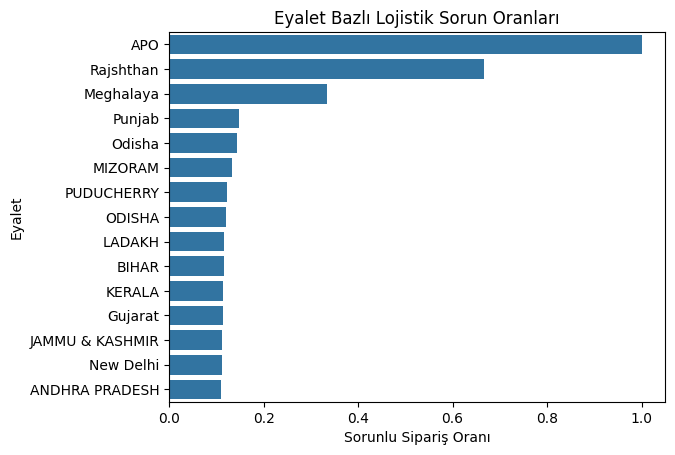

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

top_states = state_ratio.head(15)  # en sorunlu 15 eyalet
sns.barplot(x=top_states.values, y=top_states.index)
plt.xlabel("Sorunlu Sipariş Oranı")
plt.ylabel("Eyalet")
plt.title("Eyalet Bazlı Lojistik Sorun Oranları")
plt.show()


📊 Kritik Eyaletlerde Teslimat Sorun Dağılımı
Courier Status  Cancelled   Shipped   Unknown  Unshipped
ship-state                                              
APO              1.000000  0.000000  0.000000   0.000000
Meghalaya        0.333333  0.000000  0.666667   0.000000
Rajasthan        0.000000  0.945455  0.036364   0.018182


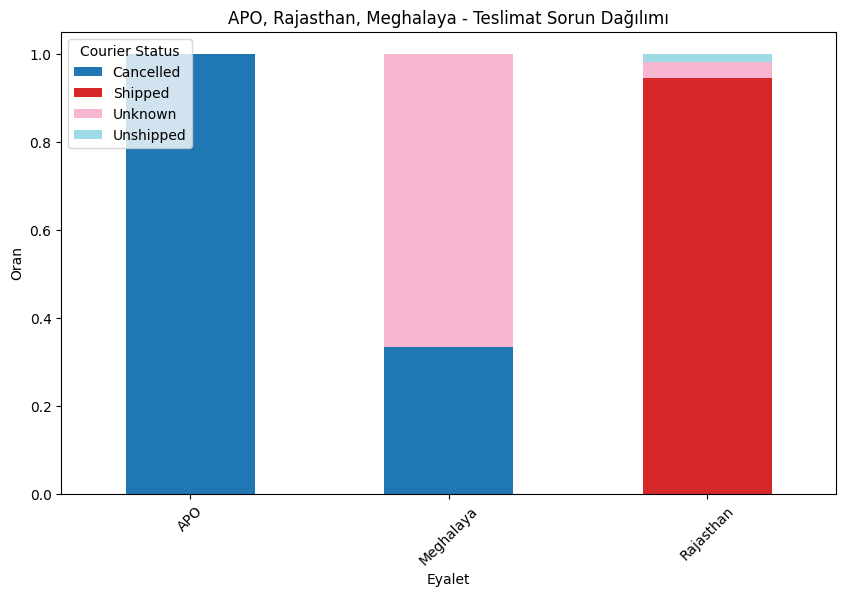

In [88]:
import matplotlib.pyplot as plt

# İncelenecek eyaletler
problem_states = ["APO", "Rajasthan", "Meghalaya"]

# Bu eyaletlerdeki Courier Status dağılımı
state_status = (
    df[df['ship-state'].isin(problem_states)]
    .groupby(['ship-state', 'Courier Status'])
    .size()
    .unstack(fill_value=0)
)

# Oranlara çevirelim
state_status_ratio = state_status.div(state_status.sum(axis=1), axis=0)

print("📊 Kritik Eyaletlerde Teslimat Sorun Dağılımı")
print(state_status_ratio)

# Görselleştirme
state_status_ratio.plot(
    kind="bar",
    stacked=True,
    figsize=(10,6),
    colormap="tab20"
)
plt.title("APO, Rajasthan, Meghalaya - Teslimat Sorun Dağılımı")
plt.ylabel("Oran")
plt.xlabel("Eyalet")
plt.xticks(rotation=45)
plt.show()


Kritik 3 Eyalet Analizi

APO

%100 Cancelled → Buradaki sorun tamamen iptallerden kaynaklanıyor.

Bu genellikle lojistik kısıt (ör. askeri bölge, teslimat yapılamayan alan) veya adres geçersizliği ile ilgilidir.

Stokla ilgisi düşük, daha çok teslimat imkânsızlığı.

Meghalaya

%33 Cancelled, %67 Unknown.

Unknown → Genellikle kargo takip güncellenmemesi / veri eksikliği anlamına gelir.

Burada hem lojistik şeffaflık sorunu hem de iptaller birlikte rol oynuyor.

Rajasthan

%95 Shipped (aslında sağlam) ama küçük oranlarda Unknown (3.6%) ve Unshipped (1.8%) var.

Yani Rajasthan’da ciddi lojistik sorun yok, ama “az da olsa” kargo güncelleme (Unknown) ve stok kaynaklı sevk edilmeme (Unshipped) yaşanıyor.

🧭 Kök Neden Özet:

APO → Lojistik/teslimat kısıtlı alan sorunu

Meghalaya → Lojistik + veri yönetimi eksikliği (takip güncellenmiyor)

Rajasthan → Küçük ölçekte stok & lojistik sorunları

APO - Cancelled Sipariş Özeti
  Category          SKU Fulfilment  Sipariş Sayısı
0      Set  J0077-SKD-S     Amazon               1


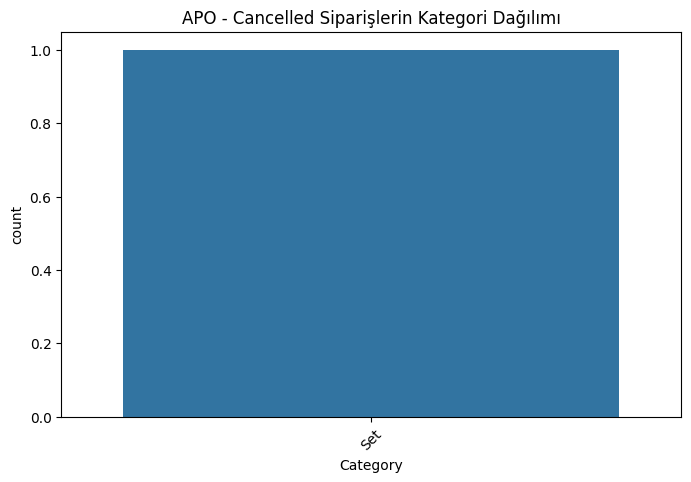

In [89]:
# APO eyaletindeki iptal edilen siparişler
apo_orders = df[(df['ship-state'] == 'APO') & (df['Courier Status'] == 'Cancelled')]

# Genel özet tablo
apo_summary = apo_orders.groupby(['Category', 'SKU', 'Fulfilment']).size().reset_index(name='Sipariş Sayısı')

print("APO - Cancelled Sipariş Özeti")
print(apo_summary)

# Kategori bazlı görselleştirme
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(data=apo_orders, x='Category', order=apo_orders['Category'].value_counts().index)
plt.title("APO - Cancelled Siparişlerin Kategori Dağılımı")
plt.xticks(rotation=45)
plt.show()


APO’da sadece 1 adet sipariş var.

Bu siparişin Kategori = Set, SKU = J0077-SKD-S, Fulfilment = Amazon

Ve tek sipariş olduğu için Cancelled olmuş.

📌 Buradan çıkarım:

Bu iptal stoktan ya da lojistikten bağımsız olabilir çünkü veri sayısı çok düşük.

APO zaten genelde askeri posta / özel bölge olduğu için lojistik kısıt ihtimali yüksek.

Ama elimizde sadece tek ürün – tek sipariş olduğu için buradan genelleme yapamayız.

👉 Bence APO için şunu diyebiliriz:

Teslimat sorunu sistematik değil, veri çok az.

Asıl anlamlı analiz, Meghalaya ve Rajasthan için olacak çünkü onlar da çok sayıda problemli sipariş var.

Meghalaya - Cancelled Sipariş Özeti
  Category           SKU Fulfilment  Sipariş Sayısı
0    kurta  JNE3703-KR-S     Amazon               1


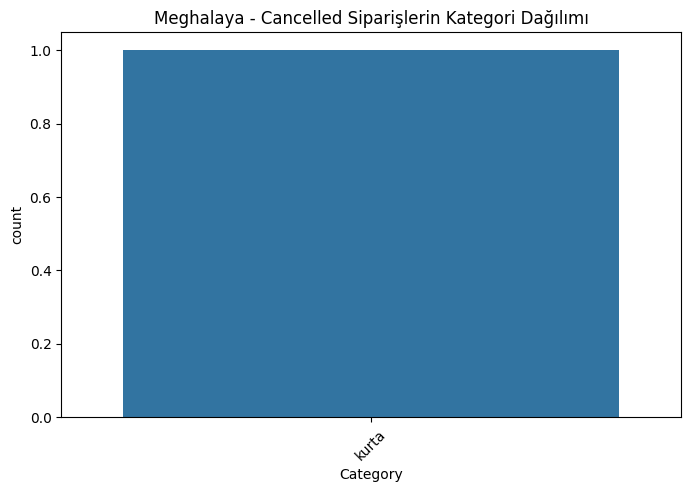


Meghalaya - Unknown Sipariş Özeti
  Category             SKU Fulfilment  Sipariş Sayısı
0      Set  SET386-KR-NP-S   Merchant               1
1    kurta      J0299-KR-S   Merchant               1


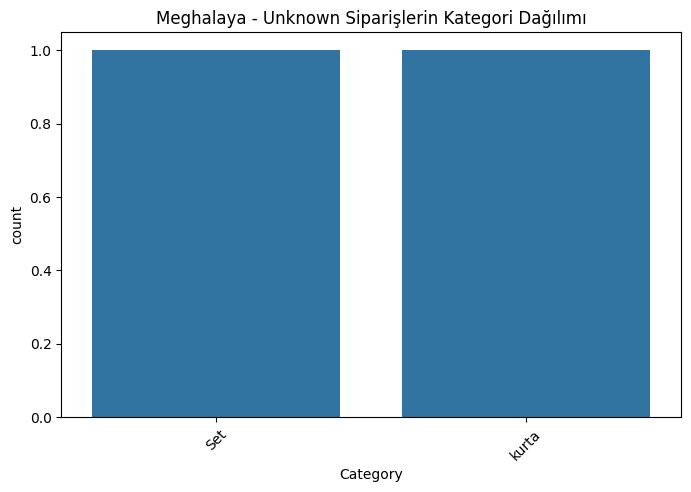

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Meghalaya verisini filtrele
df_meghalaya = df[df['ship-state'] == 'Meghalaya']

# 1. CANCELLED Siparişler - Kategori Bazlı
cancelled_meghalaya = (
    df_meghalaya[df_meghalaya['Courier Status'] == 'Cancelled']
    .groupby(['Category', 'SKU', 'Fulfilment'])
    .size()
    .reset_index(name='Sipariş Sayısı')
)

print("Meghalaya - Cancelled Sipariş Özeti")
print(cancelled_meghalaya)

plt.figure(figsize=(8,5))
sns.countplot(
    data=df_meghalaya[df_meghalaya['Courier Status'] == 'Cancelled'],
    x='Category'
)
plt.title("Meghalaya - Cancelled Siparişlerin Kategori Dağılımı")
plt.xticks(rotation=45)
plt.show()


# 2. UNKNOWN Siparişler - Kategori Bazlı
unknown_meghalaya = (
    df_meghalaya[df_meghalaya['Courier Status'] == 'Unknown']
    .groupby(['Category', 'SKU', 'Fulfilment'])
    .size()
    .reset_index(name='Sipariş Sayısı')
)

print("\nMeghalaya - Unknown Sipariş Özeti")
print(unknown_meghalaya)

plt.figure(figsize=(8,5))
sns.countplot(
    data=df_meghalaya[df_meghalaya['Courier Status'] == 'Unknown'],
    x='Category'
)
plt.title("Meghalaya - Unknown Siparişlerin Kategori Dağılımı")
plt.xticks(rotation=45)
plt.show()


Cancelled sipariş yalnızca 1 adet Kurta ve Amazon fulfilment’ta → bu daha çok stok/iptal kaynaklı görünüyor.

Unknown siparişler hem Set hem Kurta ürünlerinde Merchant fulfilment kaynaklı. Bu ise büyük ihtimalle lojistik/izleme sorunları ile ilişkili.

👉 Yani Meghalaya’daki sorun daha çok Merchant fulfilment kaynaklı lojistik problemler.

Rajasthan - Sorunlu Sipariş Özeti
  Courier Status       Category             SKU Fulfilment  Sipariş Sayısı
0        Unknown            Set  SET288-KR-NP-L   Merchant               1
1        Unknown            Top      J0301-TP-M   Merchant               1
2      Unshipped  Western Dress    J0341-DR-XXL     Amazon               1


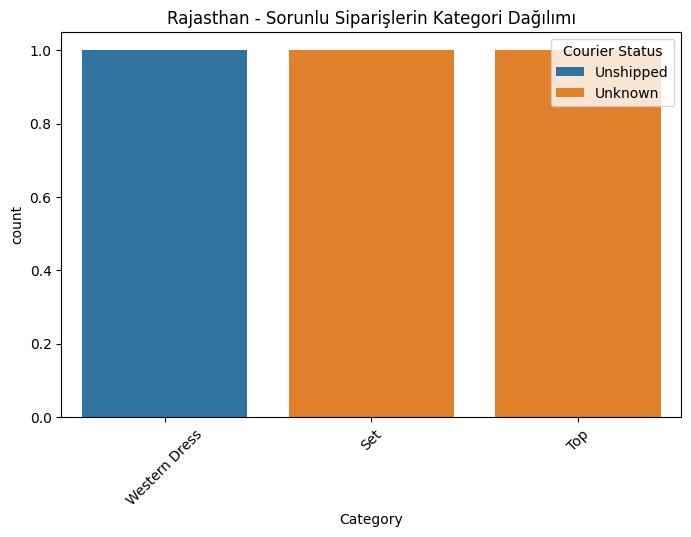

In [91]:
# Rajasthan verilerini filtrele
rajasthan_df = df[df['ship-state'] == 'Rajasthan']

# Sorunlu courier status seçelim (Cancelled, Unknown, Unshipped)
sorunlu = rajasthan_df[rajasthan_df['Courier Status'].isin(['Cancelled','Unknown','Unshipped'])]

# Kategori bazlı özet tablo
rajasthan_summary = sorunlu.groupby(['Courier Status','Category','SKU','Fulfilment']).size().reset_index(name='Sipariş Sayısı')

print("Rajasthan - Sorunlu Sipariş Özeti")
print(rajasthan_summary)

# Görselleştirme
plt.figure(figsize=(8,5))
sns.countplot(data=sorunlu, x='Category', hue='Courier Status')
plt.title("Rajasthan - Sorunlu Siparişlerin Kategori Dağılımı")
plt.xticks(rotation=45)
plt.show()


Rajasthan’da sorunlar iki kaynaktan geliyor:

Amazon kaynaklı lojistik sorun (Unshipped - Western Dress)

Merchant kaynaklı takip/iletişim eksikliği (Unknown - Set ve Top)

🔎 Bu tablo bize şunu söylüyor:

Amazon tarafında Western Dress kategorisinde gönderim yapılmamış → lojistik süreç kontrol edilmeli.

Merchant tarafında Set ve Top ürünleri için kargo güncellemesi yapılmamış → satıcı panelinde veri girişi / kargo entegrasyonu sorunu olabilir.

In [92]:
# Eyalet bazlı sorun analizi
problem_status = ['Cancelled', 'Unshipped', None]

state_analysis = (
    df.groupby("ship-state")
      .agg(total_orders=("Order ID", "count"),
           problem_orders=("Courier Status", lambda x: x.isin(problem_status).sum()))
      .reset_index()
)

# Sorun oranı
state_analysis["problem_rate"] = state_analysis["problem_orders"] / state_analysis["total_orders"]

# Etki skoru = hacim * oran
state_analysis["impact_score"] = state_analysis["total_orders"] * state_analysis["problem_rate"]

# En kritik eyaletler
state_analysis.sort_values("impact_score", ascending=False).head(10)


,ship-state,total_orders,problem_orders,problem_rate,impact_score
28,MAHARASHTRA,22260,2117,0.095103,2117.0
23,KARNATAKA,17326,1591,0.091827,1591.0
57,TELANGANA,11330,1136,0.100265,1136.0
56,TAMIL NADU,11483,1086,0.094575,1086.0
59,UTTAR PRADESH,10638,1009,0.094849,1009.0
24,KERALA,6585,753,0.114351,753.0
61,WEST BENGAL,5963,601,0.100788,601.0
1,ANDHRA PRADESH,5430,599,0.110313,599.0
14,DELHI,6782,598,0.088175,598.0
18,Gujarat,4489,510,0.113611,510.0


In [93]:
# odaklanacağımız eyaletler
focus_states = ["MAHARASHTRA", "KARNATAKA", "TELANGANA", "TAMIL NADU", "UTTAR PRADESH"]

# sadece bu eyaletleri filtrele
df_focus = df[df["ship-state"].str.upper().isin(focus_states)]

# kategori bazlı sorunlu siparişleri hesapla
summary = (
    df_focus.groupby(["ship-state", "Category"])
    .agg(
        total_orders=("Order ID", "count"),
        problem_orders=("Courier Status", lambda x: (x.isin(["Cancelled","Unshipped","Unknown"])).sum())
    )
    .reset_index()
)

# oranı hesapla
summary["problem_rate"] = summary["problem_orders"] / summary["total_orders"]

# daha anlaşılır olsun diye sırala
summary = summary.sort_values(by=["ship-state","problem_rate"], ascending=[True,False])

summary


,ship-state,Category,total_orders,problem_orders,problem_rate
4,KARNATAKA,Saree,26,5,0.192308
1,KARNATAKA,Bottom,59,10,0.169492
3,KARNATAKA,Ethnic Dress,175,27,0.154286
5,KARNATAKA,Set,6443,933,0.144808
8,KARNATAKA,kurta,6775,941,0.138893
0,KARNATAKA,Blouse,199,25,0.125628
7,KARNATAKA,Western Dress,2231,278,0.124608
6,KARNATAKA,Top,1417,154,0.108680
2,KARNATAKA,Dupatta,1,0,0.000000
10,MAHARASHTRA,Bottom,67,11,0.164179


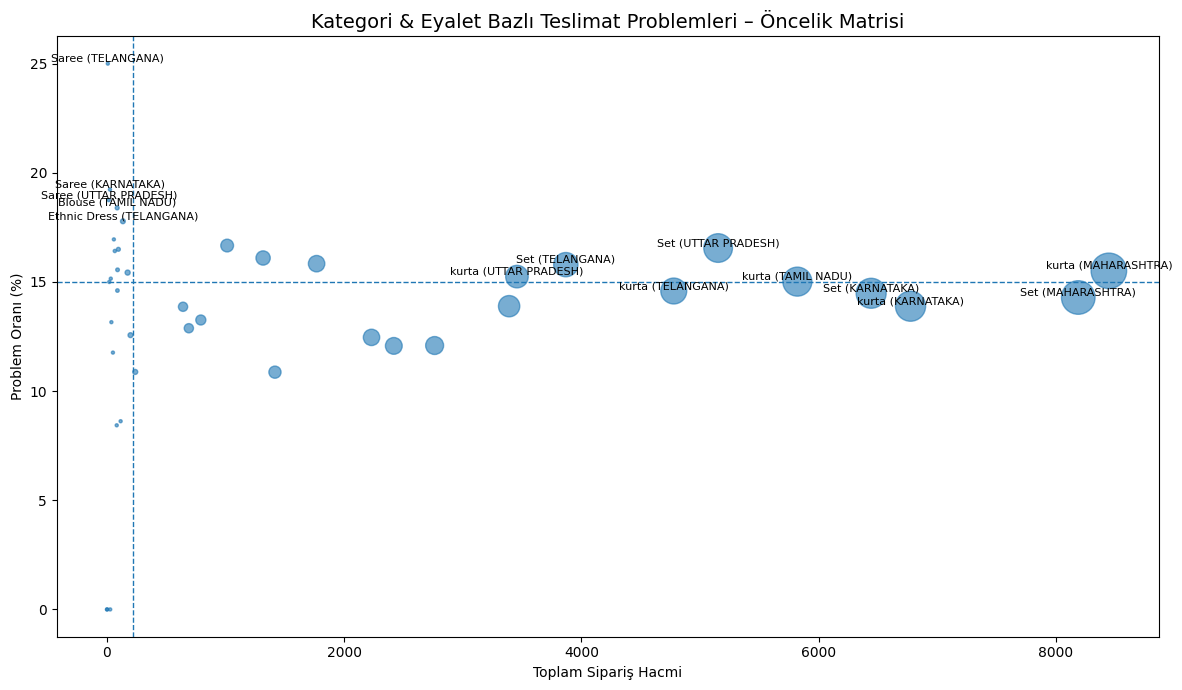

,ship-state,Category,total_orders,problem_orders,problem_rate,impact_score
16,MAHARASHTRA,kurta,8447,1310,0.155085,1310.0
13,MAHARASHTRA,Set,8189,1170,0.142875,1170.0
8,KARNATAKA,kurta,6775,941,0.138893,941.0
5,KARNATAKA,Set,6443,933,0.144808,933.0
24,TAMIL NADU,kurta,5821,874,0.150146,874.0
38,UTTAR PRADESH,Set,5153,853,0.165535,853.0
33,TELANGANA,kurta,4779,697,0.145846,697.0
30,TELANGANA,Set,3869,611,0.157922,611.0
41,UTTAR PRADESH,kurta,3457,527,0.152444,527.0
21,TAMIL NADU,Set,3391,471,0.138897,471.0


In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Odaklanacağımız eyaletler
focus_states = ["MAHARASHTRA", "KARNATAKA", "TELANGANA", "TAMIL NADU", "UTTAR PRADESH"]

# 2) Filtre
dff = df.copy()
dff["ship-state"] = dff["ship-state"].str.upper()
dff = dff[dff["ship-state"].isin(focus_states)]

# 3) Problem durumları
problem_status = ["Cancelled", "Unshipped", "Unknown"]

# 4) Eyalet × Kategori bazlı özet tablo
summary = (
    dff.groupby(["ship-state","Category"])
      .agg(total_orders=("Order ID","count"),
           problem_orders=("Courier Status", lambda x: x.isin(problem_status).sum()))
      .reset_index()
)

summary["problem_rate"] = summary["problem_orders"] / summary["total_orders"]

# 5) Bubble chart (x: toplam sipariş, y: problem oranı %, baloncuk boyutu: problem adedi)
plt.figure(figsize=(12,7))
sizes = np.clip(summary["problem_orders"], 10, None) * 0.5  # baloncuk ölçeği (çok küçükleri okunur kıl)
sc = plt.scatter(summary["total_orders"], summary["problem_rate"]*100, s=sizes, alpha=0.6)

plt.title("Kategori & Eyalet Bazlı Teslimat Problemleri – Öncelik Matrisi", fontsize=14)
plt.xlabel("Toplam Sipariş Hacmi")
plt.ylabel("Problem Oranı (%)")

# 6) Sadece kritik noktaları etiketleyelim (yüksek hacim veya yüksek oran)
for _, r in summary.iterrows():
    if (r["problem_orders"] >= 500) or (r["problem_rate"] >= 0.17):
        plt.text(r["total_orders"], r["problem_rate"]*100,
                 f"{r['Category']} ({r['ship-state']})",
                 fontsize=8, ha="center", va="bottom")

# referans çizgileri (istersen kapat)
plt.axhline(15, ls="--", lw=1)   # %15 problem oranı eşiği
plt.axvline(summary["total_orders"].median(), ls="--", lw=1)  # medyan hacim eşiği

plt.tight_layout()
plt.show()

# (İsteğe bağlı) “en kritik 10 kombinasyon” tablosu
critical = summary.copy()
critical["impact_score"] = critical["total_orders"] * critical["problem_rate"]
display(critical.sort_values("impact_score", ascending=False).head(10))


In [95]:
focus = [
    ("MAHARASHTRA","kurta"), ("MAHARASHTRA","Set"),
    ("KARNATAKA","kurta"),   ("KARNATAKA","Set"),
    ("TAMIL NADU","kurta"),
    ("UTTAR PRADESH","Set"),
    ("TELANGANA","kurta"),   ("TELANGANA","Set"),
]

mask = False
for st,cat in focus:
    mask = mask | ((df["ship-state"].str.upper()==st) & (df["Category"]==cat))

status_mix = (
    df[mask]
      .groupby(["ship-state","Category","Courier Status"])
      .size().unstack(fill_value=0)
)
status_mix_pct = (status_mix.T / status_mix.sum(axis=1)).T.round(3)
status_mix_pct.sort_index()


Courier Status          Cancelled  Shipped  Unknown  Unshipped
ship-state    Category                                        
KARNATAKA     Set           0.043    0.855    0.044      0.058
              kurta         0.044    0.861    0.044      0.051
MAHARASHTRA   Set           0.048    0.857    0.043      0.052
              kurta         0.049    0.845    0.051      0.055
TAMIL NADU    kurta         0.054    0.850    0.047      0.049
TELANGANA     Set           0.049    0.842    0.054      0.056
              kurta         0.052    0.854    0.043      0.051
UTTAR PRADESH Set           0.054    0.834    0.062      0.050

Uttar Pradesh (Set) → en kritik nokta: Unknown %6.2, Cancelled %5.4.
👉 Burada müşteri deneyimi en çok etkileniyor. İlk aksiyon buraya kaymalı.

Telangana (Set/Kurta) → ikinci öncelik. Unknown ve Unshipped aynı anda yüksek → takip entegrasyonu + stok karışıyor olabilir.

Maharashtra/Karnataka → Unknown & Unshipped %9–10 bandında → orta düzey risk.

Tamil Nadu (Kurta) → görece en sağlıklı, ama Cancelled %5.4 → ürün/ilan uyumsuzluğu şüphesi.

In [96]:
top_skus = (
    df[mask]
      .assign(problem=df["Courier Status"].isin(["Cancelled","Unshipped","Unknown"]))
      .groupby(["ship-state","Category","SKU"], as_index=False)
      .agg(total=("Order ID","count"), problems=("problem","sum"))
)
top_skus["rate"] = top_skus["problems"]/top_skus["total"]
# Her eyalet-kategori için en etkili 10 SKU
top_skus.sort_values(["ship-state","Category","problems","rate"], ascending=[True,True,False,False]).groupby(["ship-state","Category"]).head(10)


,ship-state,Category,SKU,total,problems,rate
1126,KARNATAKA,Set,SET324-KR-NP-M,58,20,0.344828
1375,KARNATAKA,Set,SET375-KR-NP-M,13,12,0.923077
163,KARNATAKA,Set,J0230-SKD-M,69,12,0.173913
1245,KARNATAKA,Set,SET345-KR-NP-M,67,11,0.164179
1439,KARNATAKA,Set,SET392-KR-NP-M,29,9,0.310345
...,...,...,...,...,...,...
11583,UTTAR PRADESH,Set,J0230-SKD-S,59,10,0.169492
11437,UTTAR PRADESH,Set,J0003-SET-XS,34,8,0.235294
12479,UTTAR PRADESH,Set,SET331-KR-NP-XS,11,7,0.636364
12446,UTTAR PRADESH,Set,SET324-KR-NP-XS,18,7,0.388889


In [97]:
focus_rows = top_skus.sort_values(["ship-state","Category","problems","rate"],
                                  ascending=[True,True,False,False]).groupby(
                                  ["ship-state","Category"]).head(10)[["ship-state","Category","SKU"]]

sku_list = focus_rows["SKU"].unique().tolist()

sku_status_mix = (
    df[df["SKU"].isin(sku_list)]
      .groupby(["ship-state","Category","SKU","Courier Status"])
      .size().unstack(fill_value=0)
)

# oran
sku_status_mix_pct = (sku_status_mix.T / sku_status_mix.sum(axis=1)).T.round(3)
sku_status_mix_pct.head(20)


Courier Status                                    Cancelled  Shipped  Unknown  \
ship-state         Category SKU                                                 
ANDAMAN & NICOBAR  Set      J0003-SET-S               0.000    1.000    0.000   
                            J0230-SKD-M               0.000    1.000    0.000   
                            SET268-KR-NP-XS           0.000    1.000    0.000   
                            SET268-KR-NP-XXL          0.500    0.500    0.000   
                            SET331-KR-NP-M            0.000    1.000    0.000   
                            SET345-KR-NP-L            0.000    1.000    0.000   
                            SET345-KR-NP-M            0.000    1.000    0.000   
                            SET392-KR-NP-M            0.000    0.000    0.000   
                   kurta    JNE2270-KR-487-A-XXL      0.000    1.000    0.000   
                            JNE3368-KR-XXXL           0.000    1.000    0.000   
                            JNE3373-KR-XXXL           0.000    1.000    0.000   
                            JNE3405-KR-L              0.333    0.333    0.000   
                            JNE3405-KR-M              0.000    1.000    0.000   
                            JNE3405-KR-S              0.000    1.000    0.000   
                            JNE3468-KR-L              0.000    1.000    0.000   
                            JNE3611-KR-XXL            0.000    1.000    0.000   
ANDHRA PRADESH     Set      J0003-SET-M               0.000    0.778    0.222   
                            J0003-SET-S               0.000    0.769    0.077   
                            J0003-SET-XS              0.000    0.600    0.200   
                            J0230-SKD-L               0.000    1.000    0.000   

Courier Status                                    Unshipped  
ship-state         Category SKU                              
ANDAMAN & NICOBAR  Set      J0003-SET-S               0.000  
                            J0230-SKD-M               0.000  
                            SET268-KR-NP-XS           0.000  
                            SET268-KR-NP-XXL          0.000  
                            SET331-KR-NP-M            0.000  
                            SET345-KR-NP-L            0.000  
                            SET345-KR-NP-M            0.000  
                            SET392-KR-NP-M            1.000  
                   kurta    JNE2270-KR-487-A-XXL      0.000  
                            JNE3368-KR-XXXL           0.000  
                            JNE3373-KR-XXXL           0.000  
                            JNE3405-KR-L              0.333  
                            JNE3405-KR-M              0.000  
                            JNE3405-KR-S              0.000  
                            JNE3468-KR-L              0.000  
                            JNE3611-KR-XXL            0.000  
ANDHRA PRADESH     Set      J0003-SET-M               0.000  
                            J0003-SET-S               0.154  
                            J0003-SET-XS              0.200  
                            J0230-SKD-L               0.000

In [98]:
sku_fulfilment_mix = (
    df[df["SKU"].isin(sku_list)]
      .groupby(["ship-state","Category","SKU","Fulfilment"])
      .size().unstack(fill_value=0)
)
(sku_fulfilment_mix.T / sku_fulfilment_mix.sum(axis=1)).T.round(3)


Fulfilment                                    Amazon  Merchant
ship-state         Category SKU                               
ANDAMAN & NICOBAR  Set      J0003-SET-S          1.0       0.0
                            J0230-SKD-M          1.0       0.0
                            SET268-KR-NP-XS      1.0       0.0
                            SET268-KR-NP-XXL     1.0       0.0
                            SET331-KR-NP-M       1.0       0.0
...                                              ...       ...
WEST BENGAL        kurta    JNE3801-KR-S         1.0       0.0
                            JNE3801-KR-XS        0.0       1.0
                            JNE3801-KR-XXL       0.5       0.5
orissa             Set      SET331-KR-NP-L       0.0       1.0
rajasthan          Set      SET291-KR-PP-L       1.0       0.0

[1238 rows x 2 columns]

In [99]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
sku_month = (
  df[df["SKU"].isin(sku_list)]
    .assign(problem=df["Courier Status"].isin(["Cancelled","Unshipped","Unknown"]))
    .groupby([df["Date"].dt.to_period("M"),"ship-state","Category","SKU"])
    .agg(orders=("Order ID","count"), problems=("problem","sum"))
    .assign(rate=lambda x: x["problems"]/x["orders"])
    .reset_index()
)
sku_month.sort_values(["ship-state","Category","SKU","Date"]).head(20)


,Date,ship-state,Category,SKU,orders,problems,rate
17,2022-04,ANDAMAN & NICOBAR,Set,J0003-SET-S,1,0,0.000000
958,2022-05,ANDAMAN & NICOBAR,Set,J0230-SKD-M,1,0,0.000000
18,2022-04,ANDAMAN & NICOBAR,Set,SET268-KR-NP-XS,1,0,0.000000
959,2022-05,ANDAMAN & NICOBAR,Set,SET268-KR-NP-XXL,2,1,0.500000
1779,2022-06,ANDAMAN & NICOBAR,Set,SET331-KR-NP-M,1,0,0.000000
960,2022-05,ANDAMAN & NICOBAR,Set,SET345-KR-NP-L,1,0,0.000000
961,2022-05,ANDAMAN & NICOBAR,Set,SET345-KR-NP-M,2,0,0.000000
1780,2022-06,ANDAMAN & NICOBAR,Set,SET392-KR-NP-M,1,1,1.000000
19,2022-04,ANDAMAN & NICOBAR,kurta,JNE2270-KR-487-A-XXL,1,0,0.000000
20,2022-04,ANDAMAN & NICOBAR,kurta,JNE3368-KR-XXXL,1,0,0.000000


In [100]:
offenders = top_skus.sort_values(["ship-state","Category","problems","rate"],
                                 ascending=[True,True,False,False]).groupby(
                                 ["ship-state","Category"]).head(10)
offenders.to_csv("kritik_sku_listesi.csv", index=False)
print("Kayıt: kritik_sku_listesi.csv")


Kayıt: kritik_sku_listesi.csv


In [101]:
# Fulfilment oranı yüksek olan Merchant SKU'ları filtrele
merchant_heavy = sku_fulfilment_mix[sku_fulfilment_mix["Merchant"] > 0.7]
merchant_heavy.to_csv("merchant_fulfilment_high.csv", index=False)
print("Kayıt: merchant_fulfilment_high.csv")


Kayıt: merchant_fulfilment_high.csv


In [102]:
# Cancelled oranı %20'den büyük olan SKU'ları bul
cancelled_skus = sku_status_mix_pct[sku_status_mix_pct["Cancelled"] > 0.2]
cancelled_skus.to_csv("cancelled_skus.csv", index=False)
print("Kayıt: cancelled_skus.csv")


Kayıt: cancelled_skus.csv


In [103]:
# Unknown > %10 olan SKU’lar
unknown_skus = sku_status_mix_pct[sku_status_mix_pct["Unknown"] > 0.1]
unknown_skus.to_csv("unknown_skus.csv", index=False)
print("Kayıt: unknown_skus.csv")


Kayıt: unknown_skus.csv


kritik_sku_listesi.csv → en çok problem üreten SKU’lar

merchant_fulfilment_high.csv → MFN oranı %70+ olan (FBA’ya taşınması önerilen) SKU’lar

cancelled_skus.csv → Cancelled oranı %20+ olan (ilan/beden/renk/fiyat netliği revizyonu) SKU’lar

unknown_skus.csv → Unknown oranı %10+ olan (manifest/entegrasyon zorunluluğu) SKU’lar

In [106]:
import pandas as pd

# 0) Yardımcı: kolon adlarını normalize et
def _norm_cols(df):
    df = df.copy()
    df = df.loc[:, ~df.columns.str.contains("^Unnamed", case=False)]
    return df.rename(columns=lambda c: c.strip().replace(" ", "_").replace("-", "_").lower())

# 1) Kaynak DF'ler RAM'de varsayılıyor:
# - sku_status_mix_pct : index = [ship-state, Category, SKU], sütunlar = Cancelled/Unknown/Unshipped/Shipped oranları
# - sku_fulfilment_mix : index = [ship-state, Category, SKU], sütunlar = Amazon/Merchant adetleri veya oranları
# - top_skus (offenders kaynağı) : ship-state/Category/SKU + total/problems/rate

# Güvenlik: reset_index ve kolon isimleri
stat_pct = _norm_cols(sku_status_mix_pct.reset_index().rename(columns={"ship-state": "ship_state"}))
ful_mix  = _norm_cols(sku_fulfilment_mix.reset_index().rename(columns={"ship-state": "ship_state"}))
offenders_df = _norm_cols(top_skus.rename(columns={"ship-state": "ship_state"}))

# 2) Aksiyon listelerini RAM'den yeniden üret
mfn_high = ful_mix[ful_mix.get("merchant", 0) > 0.7].copy()
mfn_high["action_flag"] = "move_to_fba"

cancelled = stat_pct[stat_pct.get("cancelled", 0) > 0.20].copy()
cancelled["action_flag"] = "fix_listing"

unknown = stat_pct[stat_pct.get("unknown", 0) > 0.10].copy()
unknown["action_flag"] = "enforce_manifest"

# 3) Raporu birleştir (aynı SKU birden fazla aksiyon alabilir)
keys = ["ship_state","category","sku"]
parts = []

for part in (mfn_high, cancelled, unknown):
    # sadece anahtar + kalan kolonlar
    cols = [c for c in part.columns if c not in keys]
    parts.append(part[keys + cols])

report = pd.concat(parts, ignore_index=True).drop_duplicates()

# 4) Offenders metriklerini ekle (varsa)
metric_cols = [c for c in ["total","problems","rate"] if c in offenders_df.columns]
if set(keys).issubset(offenders_df.columns) and metric_cols:
    report = report.merge(
        offenders_df[keys + metric_cols].drop_duplicates(),
        on=keys, how="left"
    )

# 5) Sırala ve kaydet
sort_cols = [c for c in ["ship_state","category","problems","rate"] if c in report.columns]
report = report.sort_values(sort_cols, ascending=[True, True, False, False], kind="mergesort")

report.to_csv("operasyon_eylem_listesi.csv", index=False)
print("Kayıt: operasyon_eylem_listesi.csv")
display(report.head(20))


Kayıt: operasyon_eylem_listesi.csv


,ship_state,category,sku,amazon,merchant,action_flag,cancelled,shipped,unknown,unshipped,total,problems,rate
0,ANDAMAN & NICOBAR,Set,SET392-KR-NP-M,0.0,1.0,move_to_fba,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,ANDAMAN & NICOBAR,Set,SET268-KR-NP-XXL,NaN,NaN,fix_listing,0.500,0.500,0.0,0.000,NaN,NaN,NaN
1,ANDAMAN & NICOBAR,kurta,JNE3405-KR-M,0.0,1.0,move_to_fba,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ANDAMAN & NICOBAR,kurta,JNE3468-KR-L,0.0,1.0,move_to_fba,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,ANDAMAN & NICOBAR,kurta,JNE3405-KR-L,NaN,NaN,fix_listing,0.333,0.333,0.0,0.333,NaN,NaN,NaN
3,ANDHRA PRADESH,Set,J0003-SET-M,1.0,8.0,move_to_fba,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ANDHRA PRADESH,Set,J0003-SET-S,9.0,4.0,move_to_fba,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ANDHRA PRADESH,Set,J0003-SET-XS,4.0,1.0,move_to_fba,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ANDHRA PRADESH,Set,J0230-SKD-L,4.0,1.0,move_to_fba,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ANDHRA PRADESH,Set,J0230-SKD-M,9.0,2.0,move_to_fba,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
# offenders_df'yi normalize et
offenders_df = top_skus.reset_index().copy()
offenders_df = offenders_df.rename(columns={
    "ship-state": "ship_state",
    "Category": "category",
    "SKU": "sku"
})

# kolonları kontrol et
print(offenders_df.columns.tolist())

# sadece gerekli kolonları al
metric_cols = [c for c in ["total","problems","rate"] if c in offenders_df.columns]
offenders_keep = offenders_df[["ship_state","category","sku"] + metric_cols].drop_duplicates()

# merge tekrar
report2 = report.merge(offenders_keep, on=["ship_state","category","sku"], how="left")

# kaydet
report2.to_csv("operasyon_eylem_listesi_v2.csv", index=False)
print("Kayıt: operasyon_eylem_listesi_v2.csv")
display(report2.head(20))


['index', 'ship_state', 'category', 'sku', 'total', 'problems', 'rate']
Kayıt: operasyon_eylem_listesi_v2.csv


,ship_state,category,sku,amazon,merchant,action_flag,cancelled,shipped,unknown,unshipped,total_x,problems_x,rate_x,total_y,problems_y,rate_y
0,ANDAMAN & NICOBAR,Set,SET392-KR-NP-M,0.0,1.0,move_to_fba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ANDAMAN & NICOBAR,Set,SET268-KR-NP-XXL,NaN,NaN,fix_listing,0.500,0.500,0.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN
2,ANDAMAN & NICOBAR,kurta,JNE3405-KR-M,0.0,1.0,move_to_fba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ANDAMAN & NICOBAR,kurta,JNE3468-KR-L,0.0,1.0,move_to_fba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ANDAMAN & NICOBAR,kurta,JNE3405-KR-L,NaN,NaN,fix_listing,0.333,0.333,0.0,0.333,NaN,NaN,NaN,NaN,NaN,NaN
5,ANDHRA PRADESH,Set,J0003-SET-M,1.0,8.0,move_to_fba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ANDHRA PRADESH,Set,J0003-SET-S,9.0,4.0,move_to_fba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ANDHRA PRADESH,Set,J0003-SET-XS,4.0,1.0,move_to_fba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,ANDHRA PRADESH,Set,J0230-SKD-L,4.0,1.0,move_to_fba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,ANDHRA PRADESH,Set,J0230-SKD-M,9.0,2.0,move_to_fba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
import pandas as pd

# Veri oku
df = pd.read_csv("Amazon Sale Report.csv")

# Temizlik (boşluk, küçük harf)
df.columns = df.columns.str.strip().str.lower()

# İlgili kolonları al
cols = ["ship-state", "fulfilment", "status"]
df_sub = df[cols].copy()

# Problem kategorisi (Cancelled, Unknown, Unshipped)
critical_status = ["Cancelled", "Unknown", "Unshipped"]

# Pivot tablo: eyalet x fulfilment x status
pivot_fulfil = pd.pivot_table(
    df_sub,
    index="ship-state",
    columns=["fulfilment","status"],
    aggfunc=len,
    fill_value=0
)

# Toplam sipariş & problem sayısı ekle
pivot_fulfil["total_orders"] = df_sub.groupby("ship-state")["status"].count()
pivot_fulfil["problem_orders"] = df_sub[df_sub["status"].isin(critical_status)].groupby("ship-state")["status"].count()

# Oran
pivot_fulfil["problem_rate"] = pivot_fulfil["problem_orders"] / pivot_fulfil["total_orders"]

# Eyaletleri problem oranına göre sırala
pivot_fulfil = pivot_fulfil.sort_values("problem_rate", ascending=False)

pivot_fulfil.head(10)


/tmp/ipython-input-1182399663.py:4: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Amazon Sale Report.csv")


fulfilment            Amazon                           Merchant          \
status             Cancelled Pending Shipped Shipping Cancelled Pending   
ship-state                                                                
APO                        1       0       0        0         0       0   
Meghalaya                  1       0       0        0         2       0   
Rajshthan                  1       0       2        0         0       0   
Arunachal Pradesh          0       0       1        0         1       0   
LAKSHADWEEP                0       0       1        0         1       0   
Odisha                     3       0      12        0         2       0   
MIZORAM                    6       4      38        0         8       1   
HIMACHAL PRADESH          79       0     414        0        67       0   
KERALA                   710      19    3530        0       465       9   
ANDAMAN & NICOBAR         23       2     138        0        22       0   

fulfilment                                                          \
status             Pending - Waiting for Pick Up Shipped - Damaged   
ship-state                                                           
APO                                            0                 0   
Meghalaya                                      0                 0   
Rajshthan                                      0                 0   
Arunachal Pradesh                              0                 0   
LAKSHADWEEP                                    0                 0   
Odisha                                         0                 0   
MIZORAM                                        0                 0   
HIMACHAL PRADESH                               3                 0   
KERALA                                        13                 0   
ANDAMAN & NICOBAR                              3                 0   

fulfilment                                                                 \
status             Shipped - Delivered to Buyer Shipped - Lost in Transit   
ship-state                                                                  
APO                                           0                         0   
Meghalaya                                     0                         0   
Rajshthan                                     0                         0   
Arunachal Pradesh                             1                         0   
LAKSHADWEEP                                   1                         0   
Odisha                                        2                         0   
MIZORAM                                       7                         0   
HIMACHAL PRADESH                            200                         0   
KERALA                                     1686                         0   
ANDAMAN & NICOBAR                            44                         0   

fulfilment                                                         \
status             Shipped - Out for Delivery Shipped - Picked Up   
ship-state                                                          
APO                                         0                   0   
Meghalaya                                   0                   0   
Rajshthan                                   0                   0   
Arunachal Pradesh                           0                   0   
LAKSHADWEEP                                 0                   1   
Odisha                                      0                   1   
MIZORAM                                     0                   7   
HIMACHAL PRADESH                            0                   9   
KERALA                                      1                  69   
ANDAMAN & NICOBAR                           0                  14   

fulfilment                                                                   \
status             Shipped - Rejected by Buyer Shipped - Returned to Seller   
ship-state                                             

Çıktının Anlamı

total_orders: O eyaletten verilen toplam sipariş

problem_orders: Cancelled, Unknown, Unshipped gibi kritik problemlere giren siparişler

problem_rate: Problem oranı

Gözlemler

APO ve Meghalaya %100 problem oranı → ama sipariş sayısı çok düşük (1–3 adet). Bu yüzden istatistiksel olarak önemsiz olabilir.

Kerala → en büyük sipariş hacmine sahip (6585), problem oranı %17.8 → ciddi bir hacimle geliyor, kesinlikle odaklanılması gereken eyalet.

Himachal Pradesh, Mizoram, Andaman & Nicobar → %17–18 civarı, orta hacimli ama dikkat çekici.

Odisha & Rajasthan → düşük hacim + orta seviye oran.

Sonraki Adımlar

Buradan sonra birkaç farklı derinleşme seçeneğimiz var:

Fulfilment bazlı kırılım grafikleri: MFN mi FBA mı problem yaratıyor → barplot/pie chart ile görebiliriz.

Kategori + eyalet birleşimi: Hangi eyaletlerde hangi kategoriler problemli, görselleştirebiliriz.

Problem tipi dağılımı: Cancelled vs Unshipped vs Unknown → en sık problem türü nedir?

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.dpi'] = 140

# veriyi al
df = pd.read_csv("Amazon Sale Report.csv", low_memory=False)
df.columns = df.columns.str.strip().str.lower()

# kritik durumlar
critical = ["Cancelled", "Unknown", "Unshipped"]
df["is_problem"] = df["status"].isin(critical)


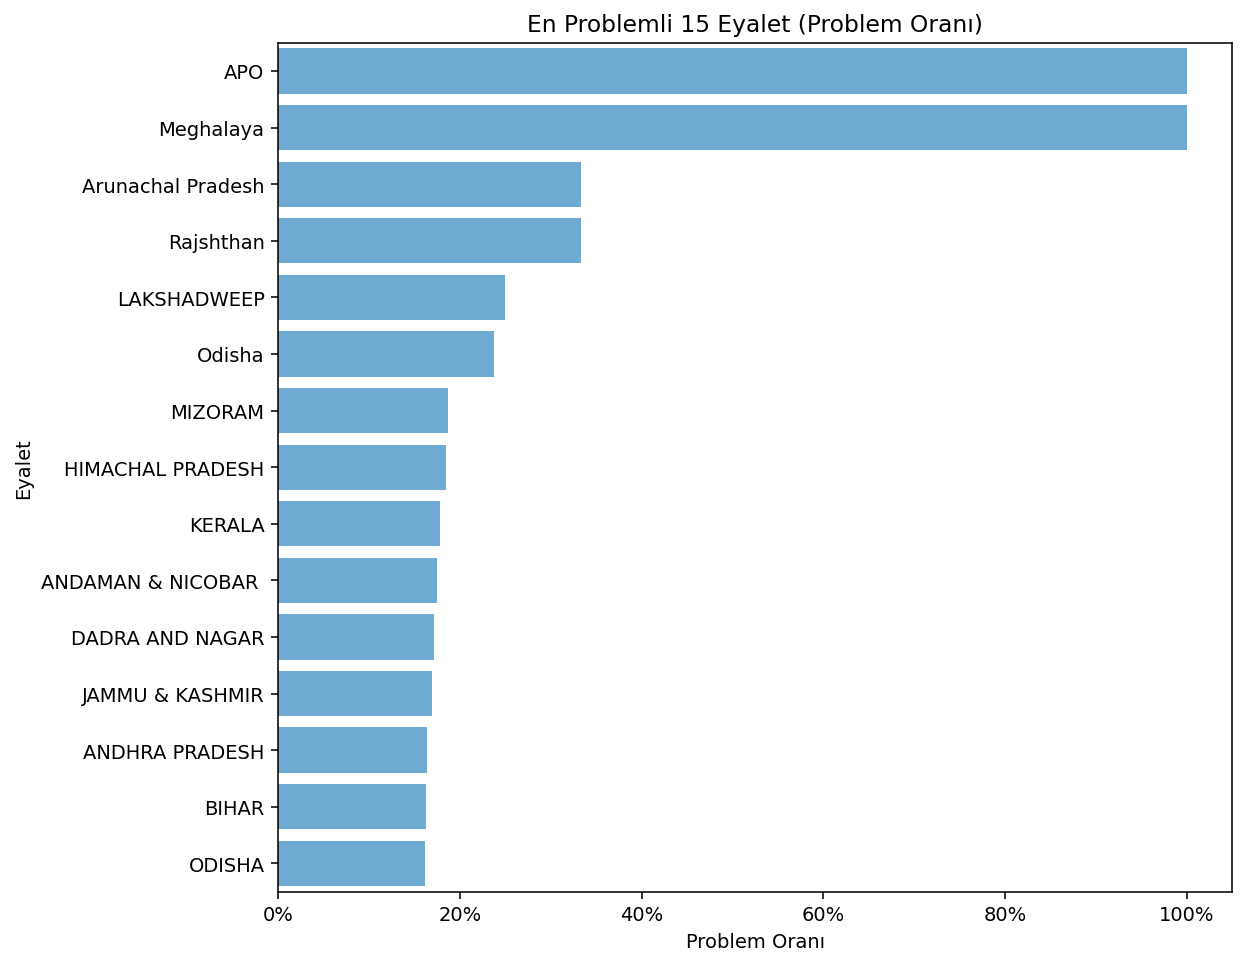

In [112]:
state_summary = (df.groupby("ship-state", as_index=False)
                   .agg(total=("status","count"),
                        problems=("is_problem","sum")))
state_summary["problem_rate"] = state_summary["problems"] / state_summary["total"]

top_states = state_summary.sort_values("problem_rate", ascending=False).head(15)

plt.figure(figsize=(9,7))
sns.barplot(data=top_states, y="ship-state", x="problem_rate", color="#5DADE2")
plt.xlabel("Problem Oranı")
plt.ylabel("Eyalet")
plt.title("En Problemli 15 Eyalet (Problem Oranı)")
plt.gca().xaxis.set_major_formatter(lambda x, pos: f"{x:.0%}")
plt.tight_layout()
plt.savefig("eyalet_problem_orani_top15.png", bbox_inches="tight")
plt.show()


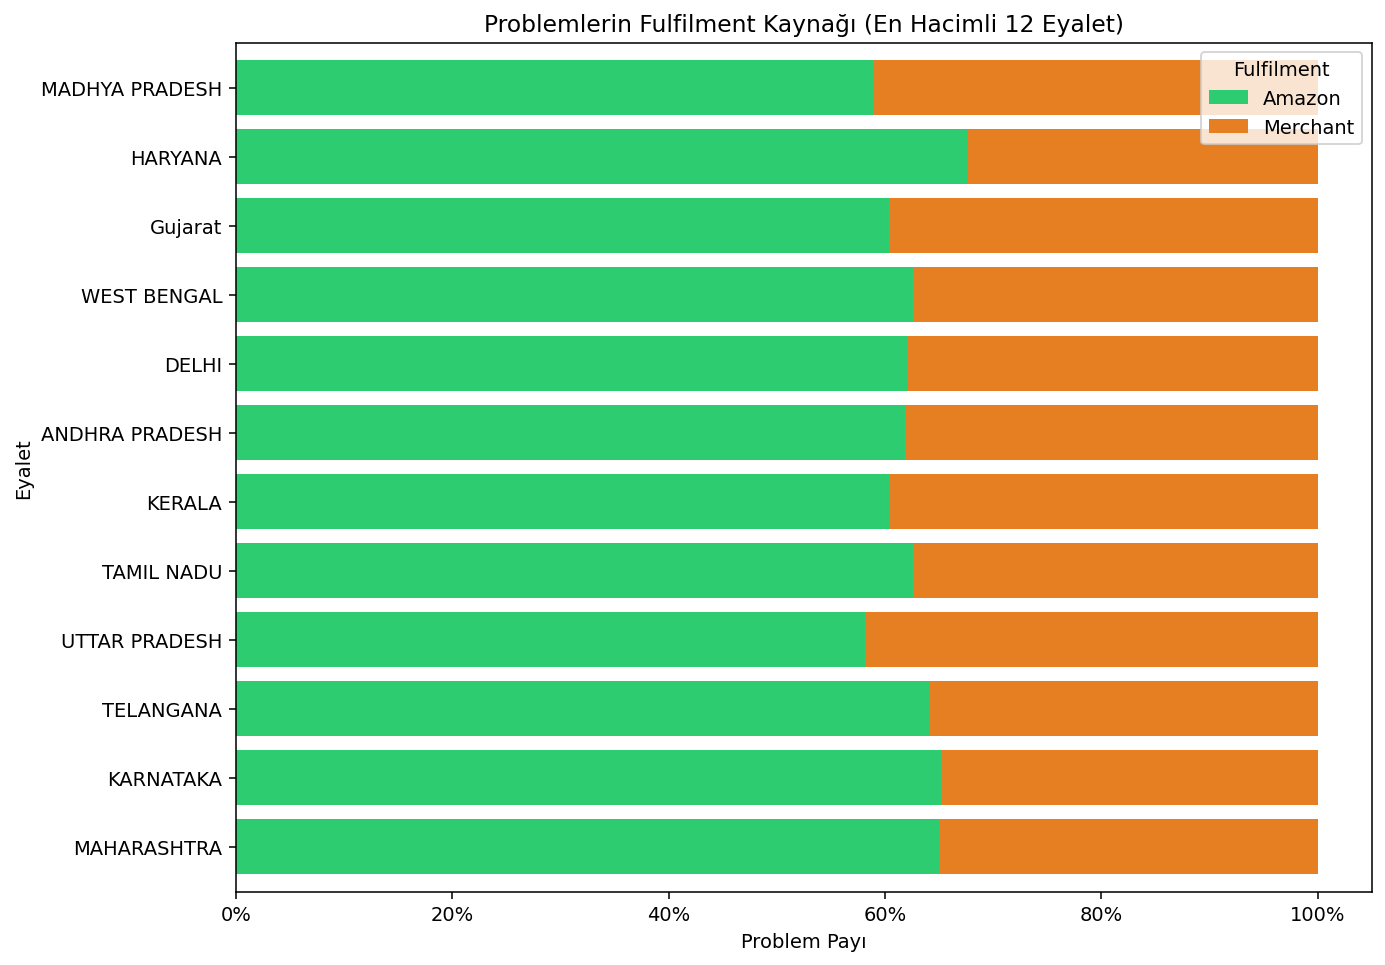

In [113]:
# sadece problem kayıtları
ful = (df[df["status"].isin(critical)]
        .groupby(["ship-state","fulfilment"])
        .size().unstack(fill_value=0))

# en çok problem adedine sahip 12 eyaleti göster
ful = ful.loc[ful.sum(1).sort_values(ascending=False).head(12).index]

ful_pct = ful.div(ful.sum(1), axis=0)  # % paylar

ax = ful_pct.plot(kind="barh", stacked=True, figsize=(10,7), width=0.8,
                  color={"Amazon":"#2ECC71", "Merchant":"#E67E22"})
plt.xlabel("Problem Payı")
plt.ylabel("Eyalet")
plt.title("Problemlerin Fulfilment Kaynağı (En Hacimli 12 Eyalet)")
plt.gca().xaxis.set_major_formatter(lambda x, pos: f"{x:.0%}")
plt.legend(title="Fulfilment")
plt.tight_layout()
plt.savefig("fulfilment_kaynagi_stacked.png", bbox_inches="tight")
plt.show()


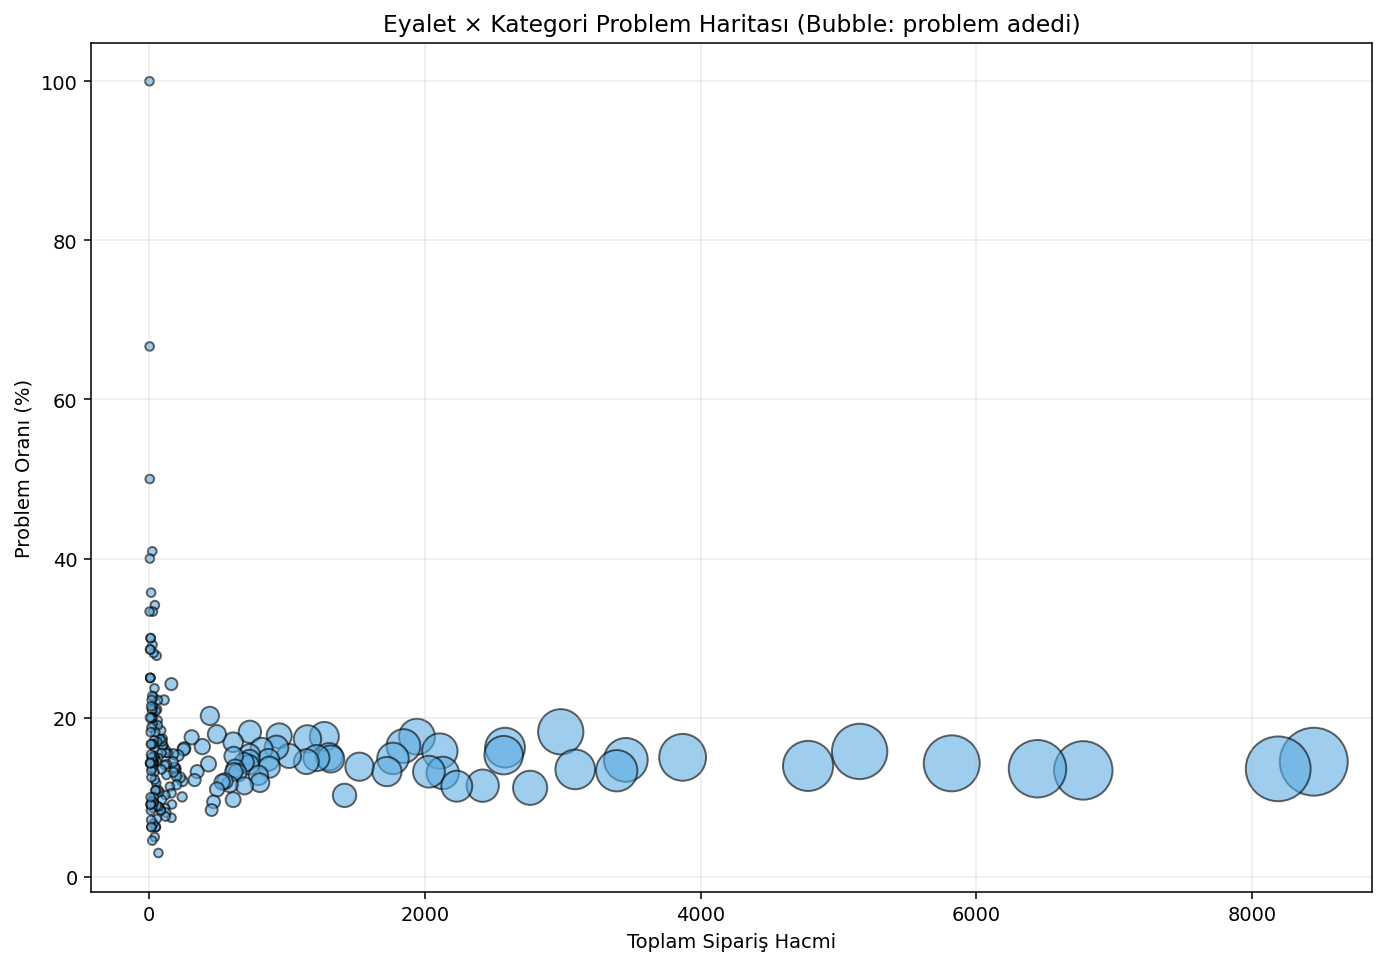

In [115]:
cat = (df.groupby(["ship-state","category"], as_index=False)
         .agg(total=("status","count"),
              problems=("is_problem","sum")))
cat["problem_rate"] = cat["problems"] / cat["total"]

# görsel sadelik için yalnızca ilk 200 kombinasyon (gerekirse artır/azalt)
cat_viz = cat.sort_values("problems", ascending=False).head(200)

plt.figure(figsize=(10,7))
plt.scatter(cat_viz["total"], cat_viz["problem_rate"]*100,
            s=np.clip(cat_viz["problems"], 20, None), alpha=0.6, c="#5DADE2", edgecolor="k")
plt.xlabel("Toplam Sipariş Hacmi")
plt.ylabel("Problem Oranı (%)")
plt.title("Eyalet × Kategori Problem Haritası (Bubble: problem adedi)")
plt.grid(alpha=0.25)
plt.tight_layout()
plt.savefig("eyalet_kategori_bubble.png", bbox_inches="tight")
plt.show()

